In [1]:
from __future__ import annotations

import seaborn as sns

from utils import get_trial_dirs, get_trial_ids, get_trial_info, get_trial_params, get_trial_progress, plot_trials

sns.set_theme()

In [2]:
search_params = [
    "batch_size", 
    "lr", 
    "n_hidden", 
    "n_latent", 
    "n_layers",
]
experiment_id = "2023_09_06_mouse_full"
root_dir = f"../logs/{experiment_id}"

In [3]:
trial_dirs = get_trial_dirs(root_dir, filter_incomplete=True)
trial_ids = get_trial_ids(trial_dirs)

trial_params = {trial_id: get_trial_params(root_dir, trial_dir, search_params) for trial_id, trial_dir in zip(trial_ids, trial_dirs)}
trial_progress = {trial_id: get_trial_progress(root_dir, trial_dir) for trial_id, trial_dir in zip(trial_ids, trial_dirs)}
trial_info = get_trial_info(trial_params, trial_progress)

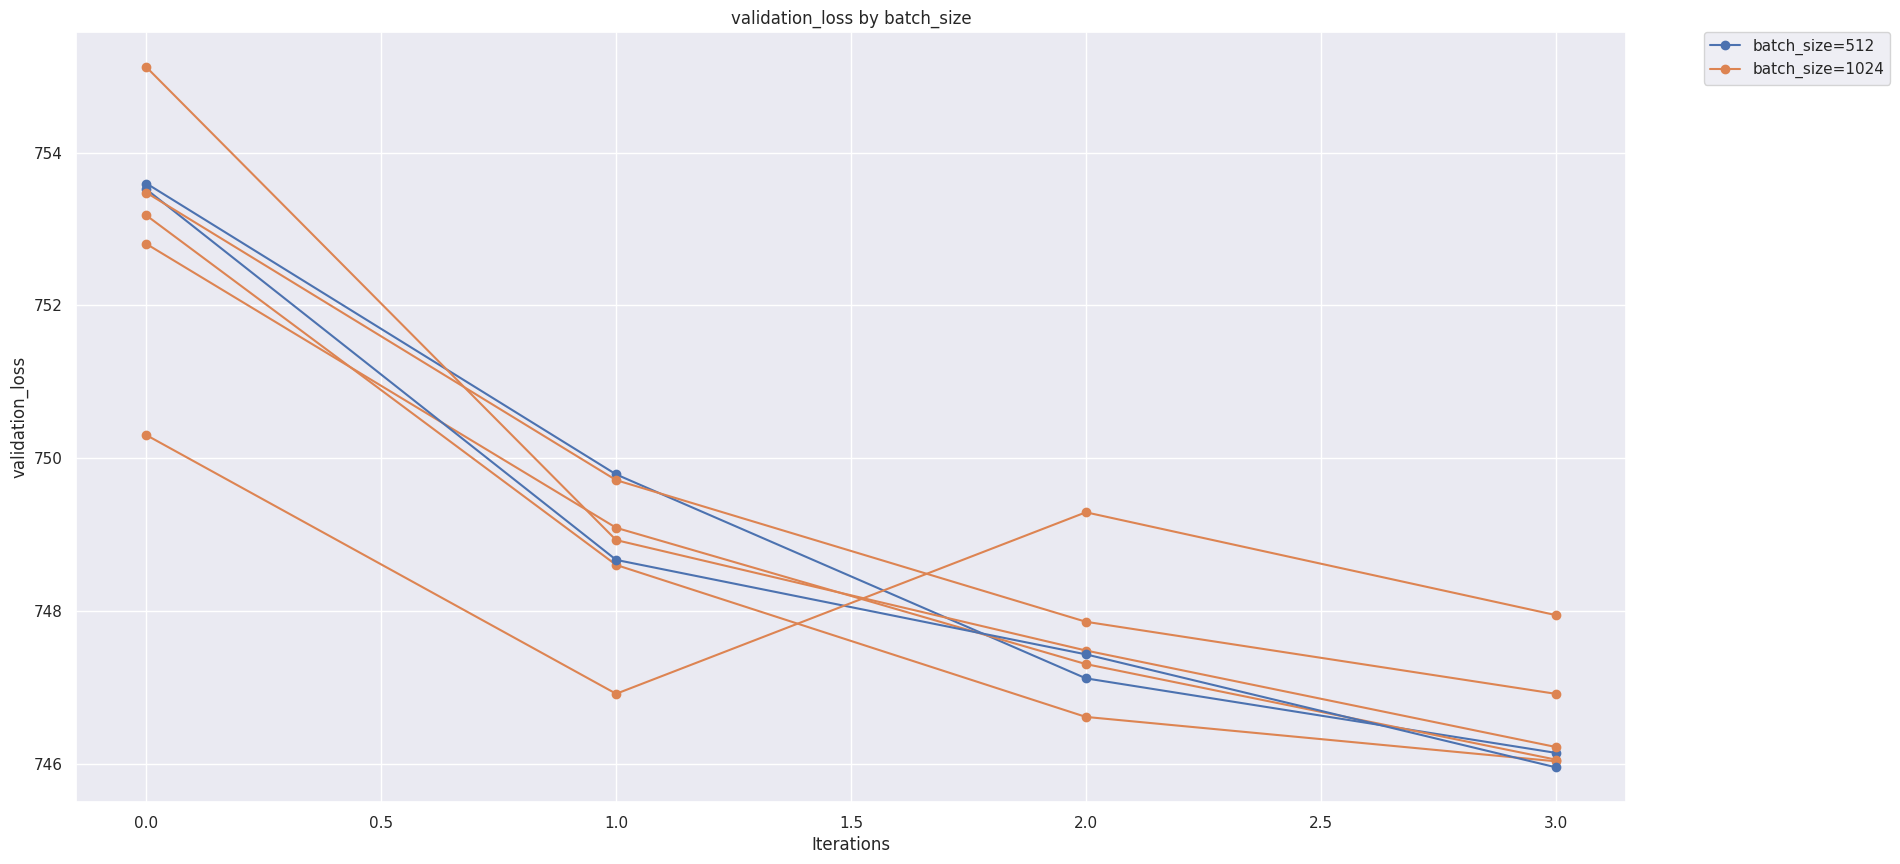

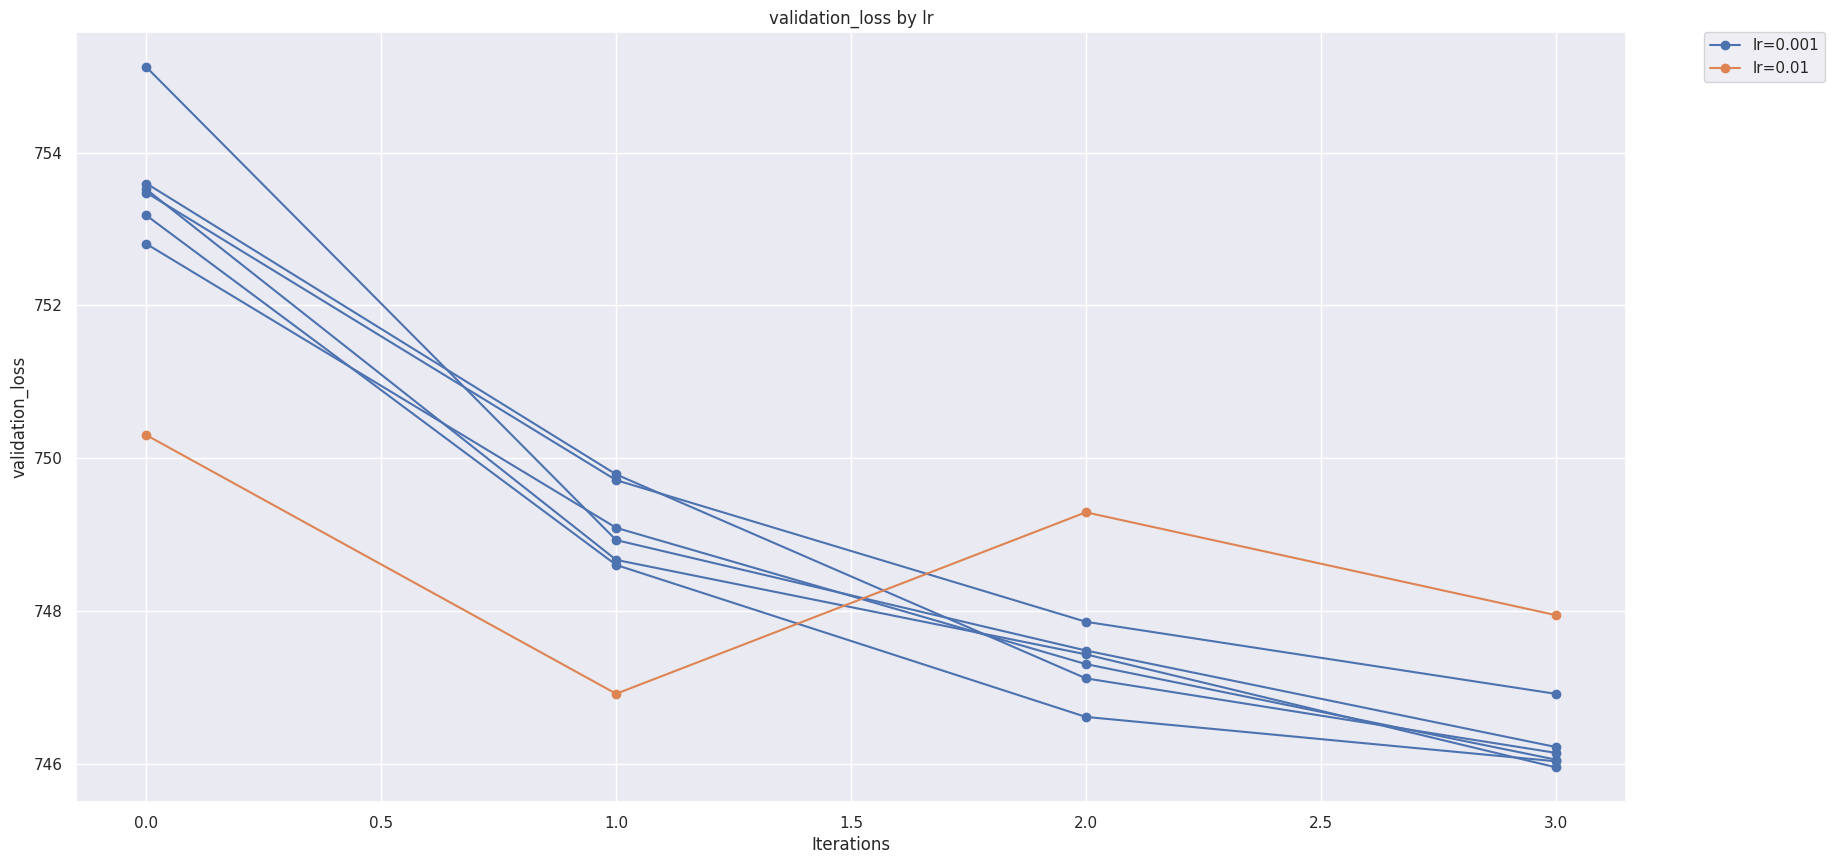

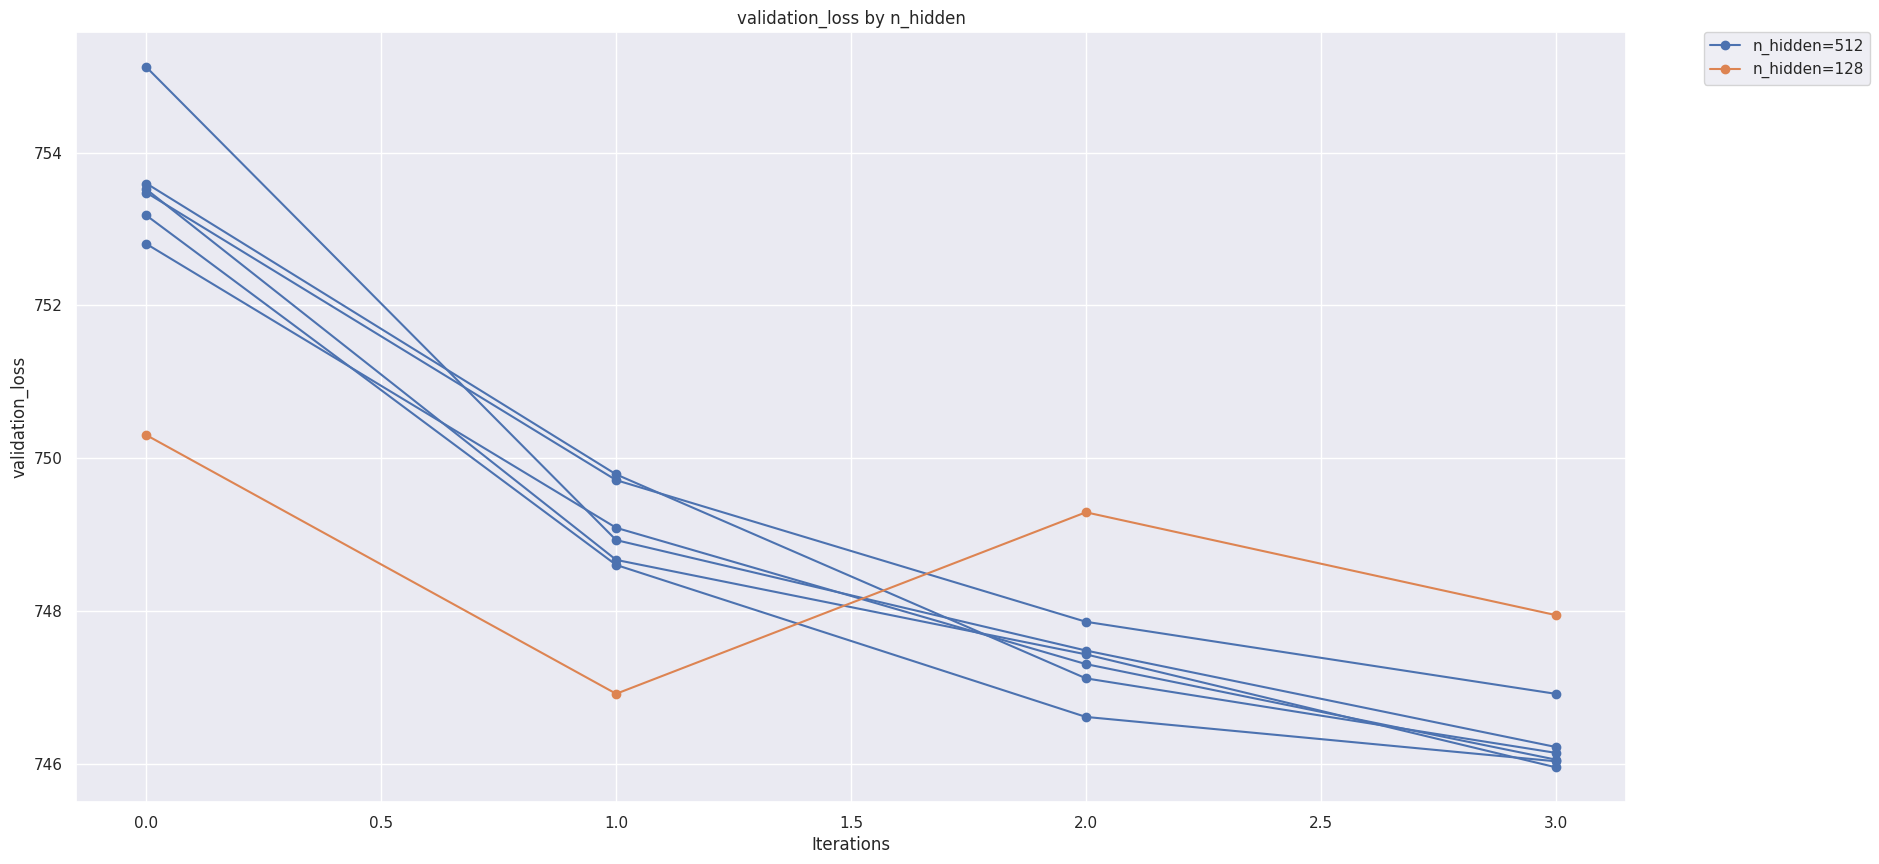

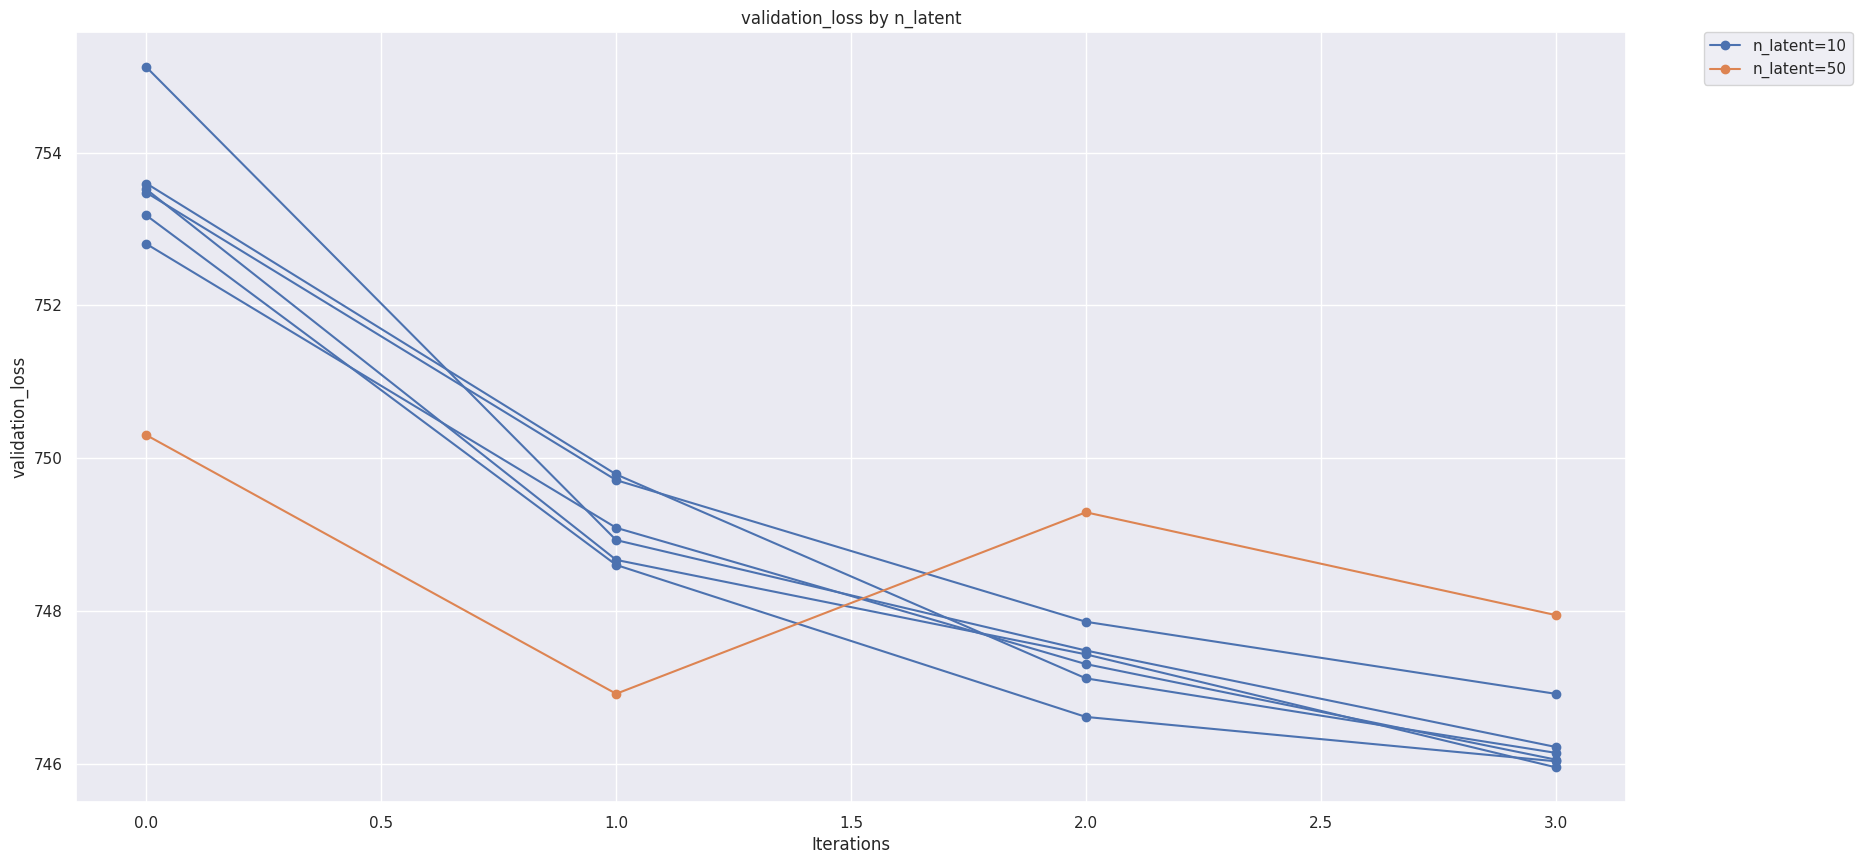

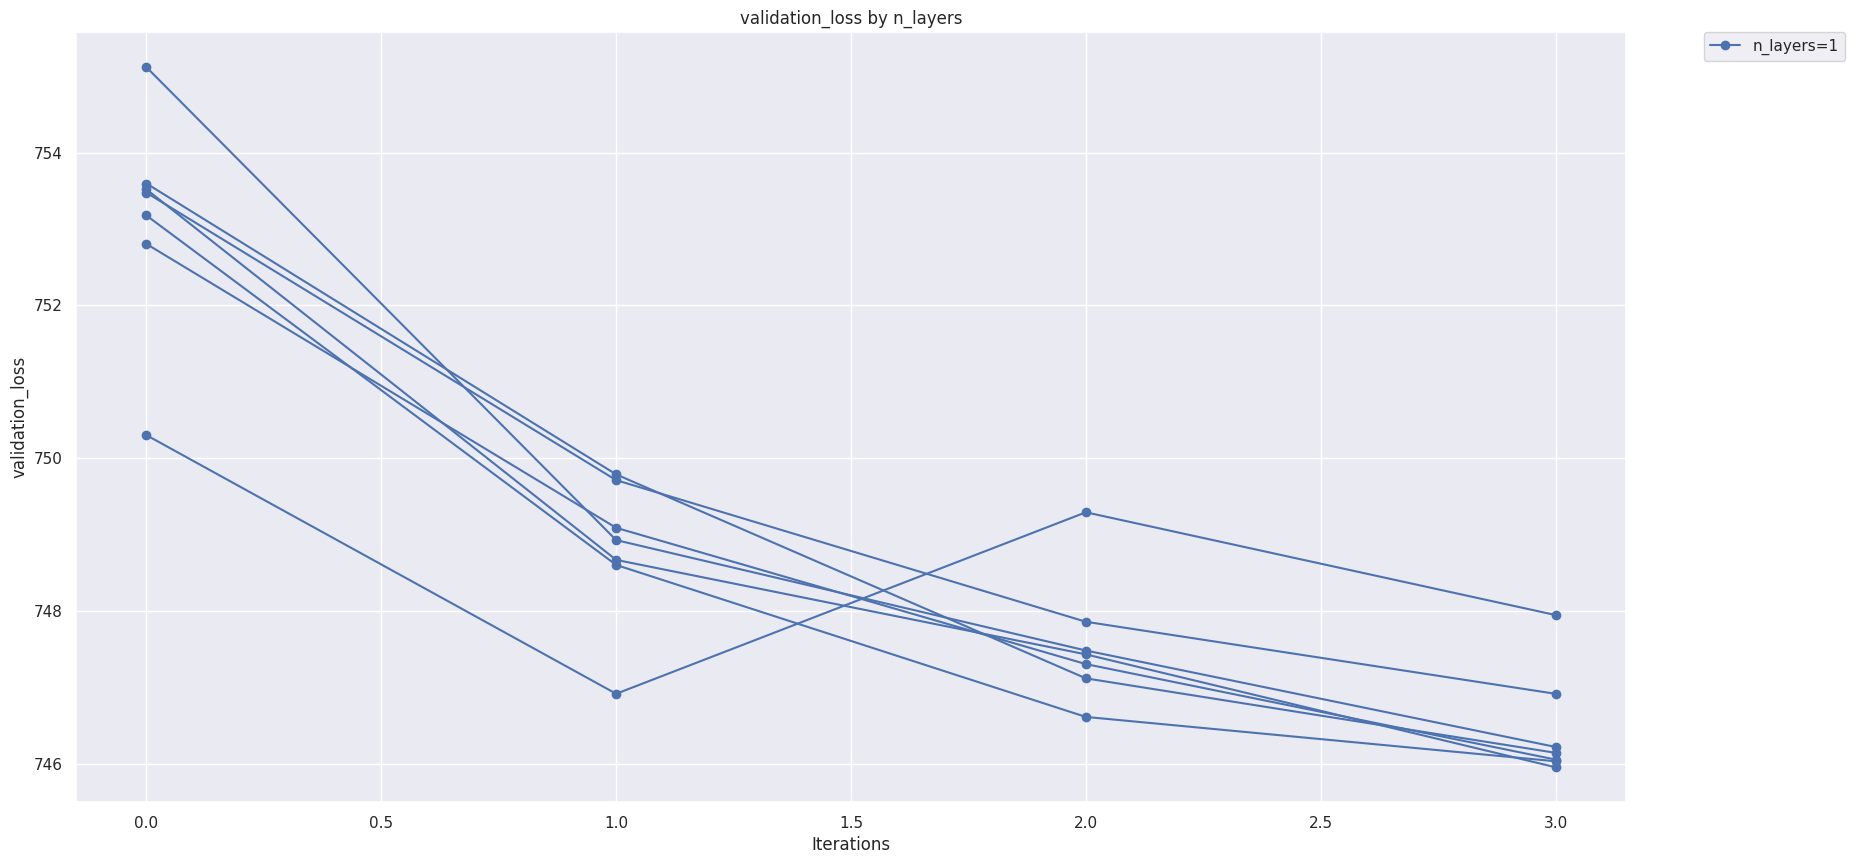

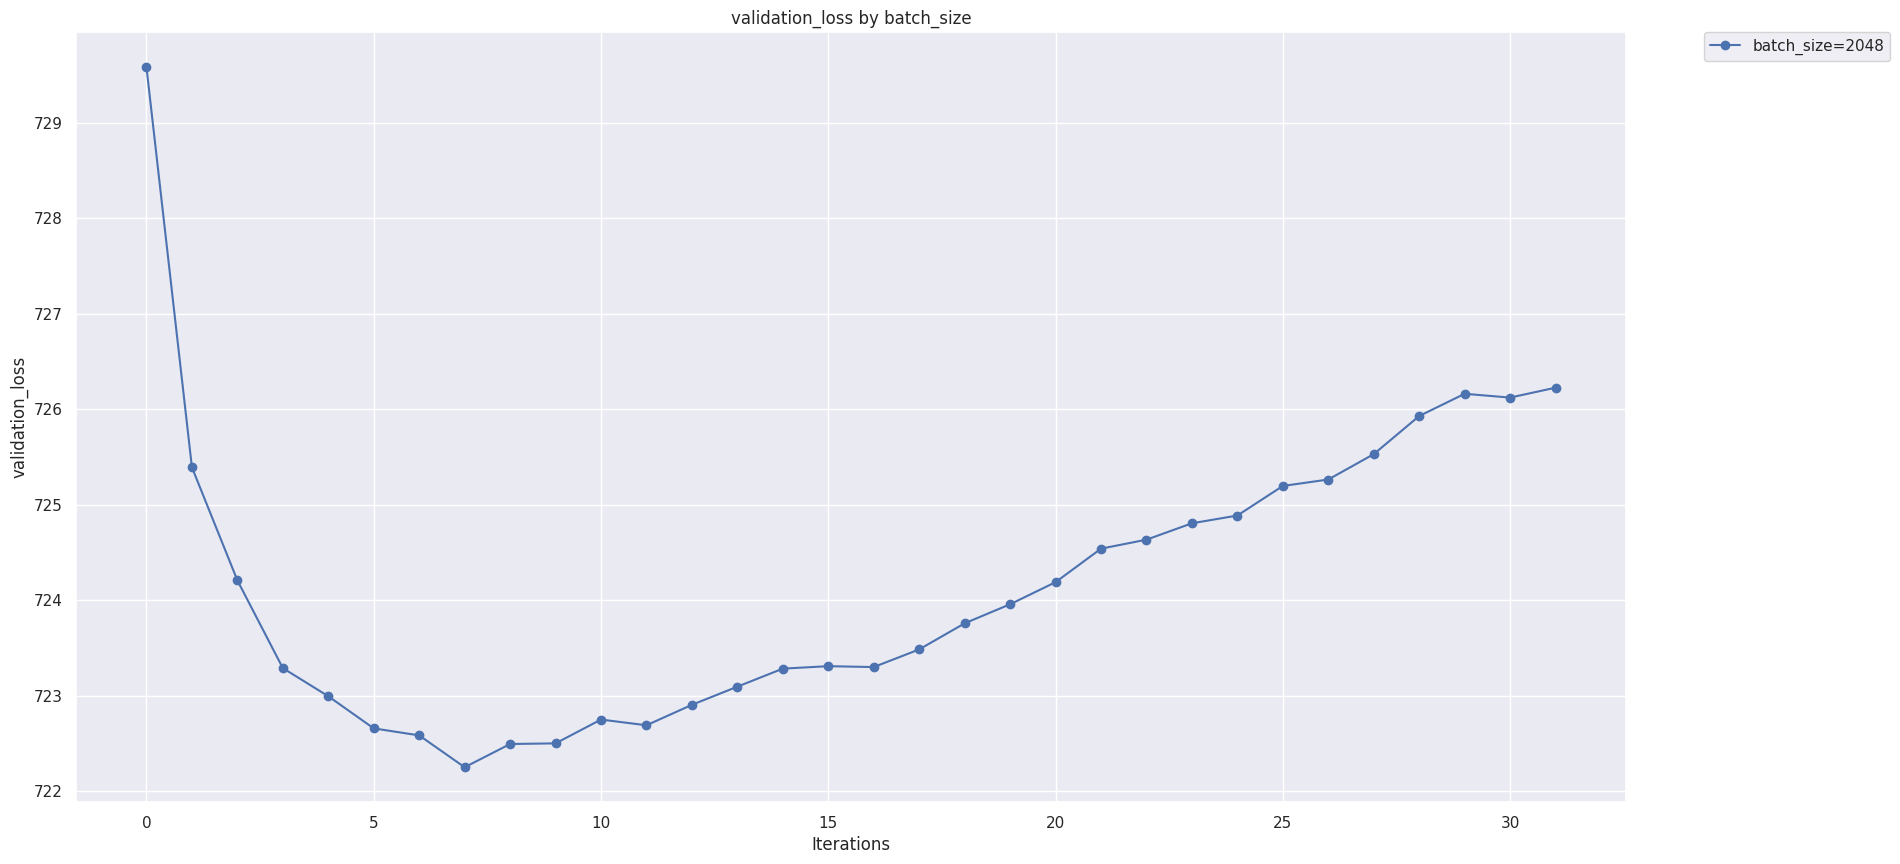

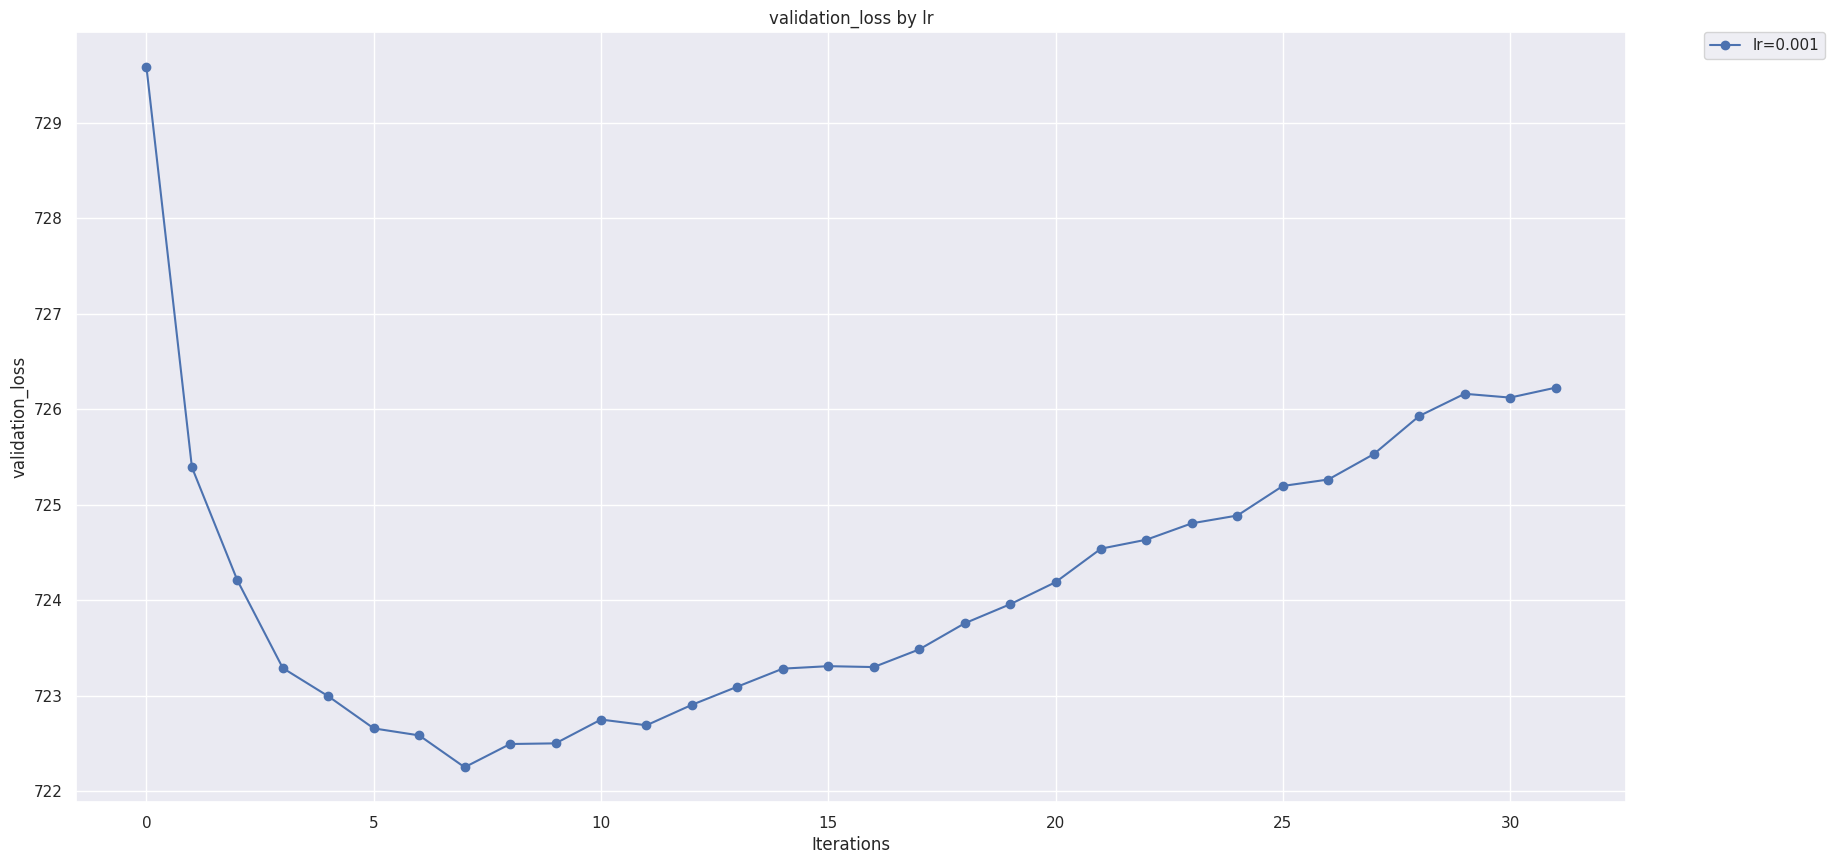

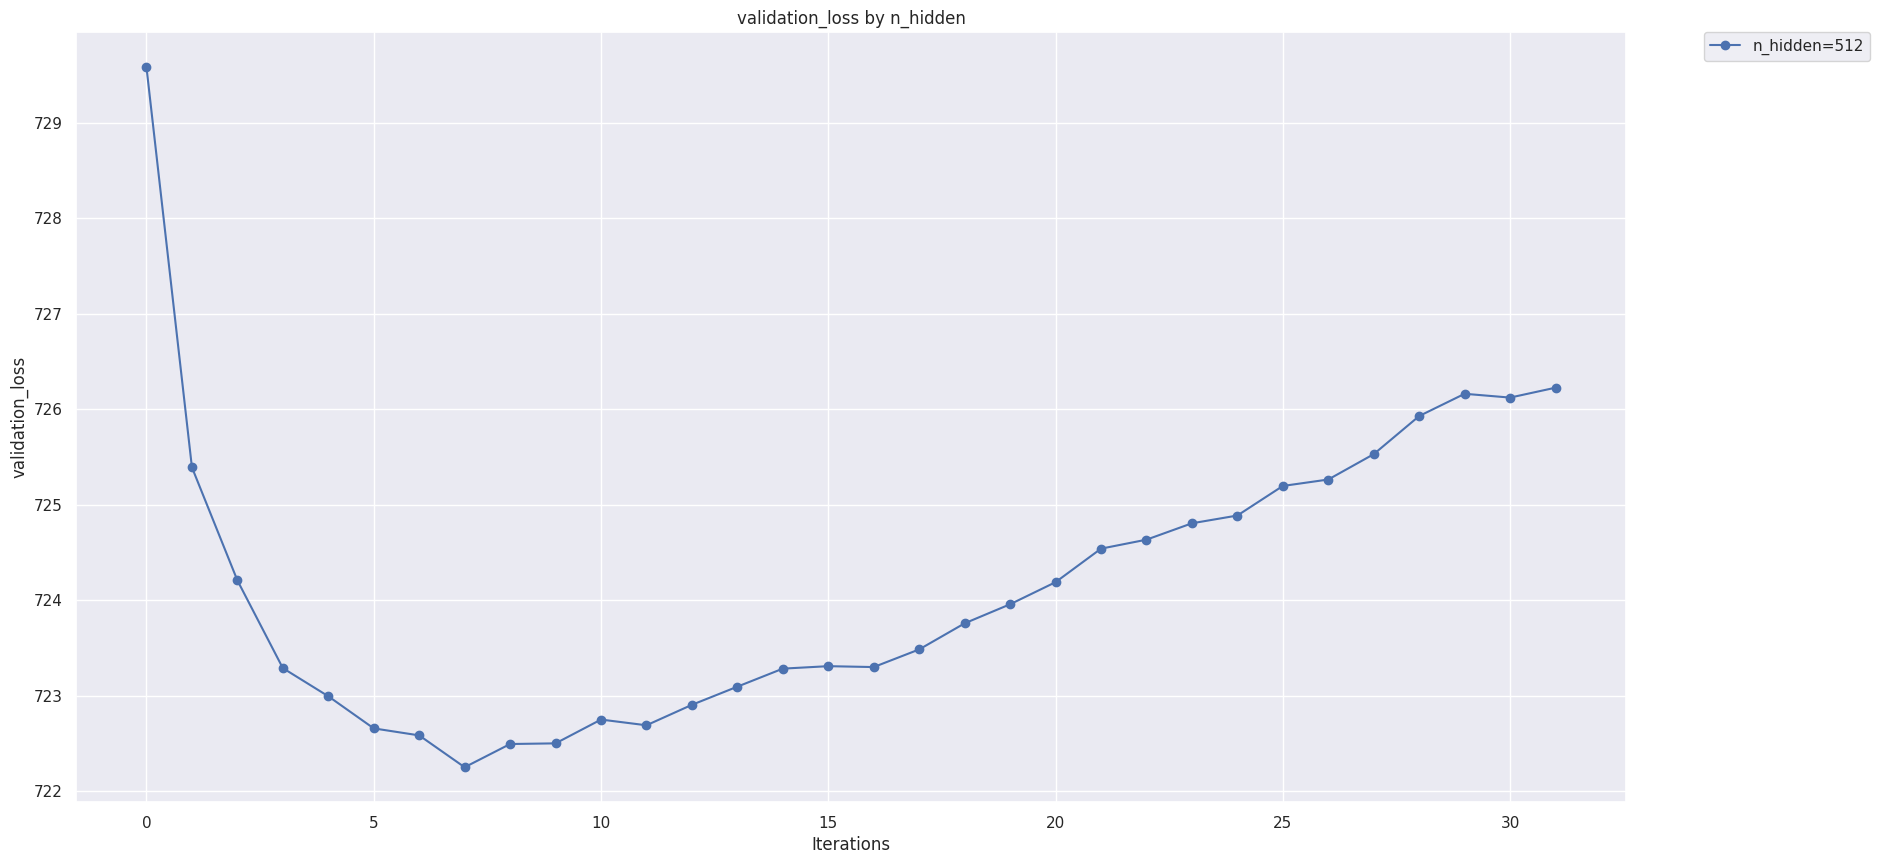

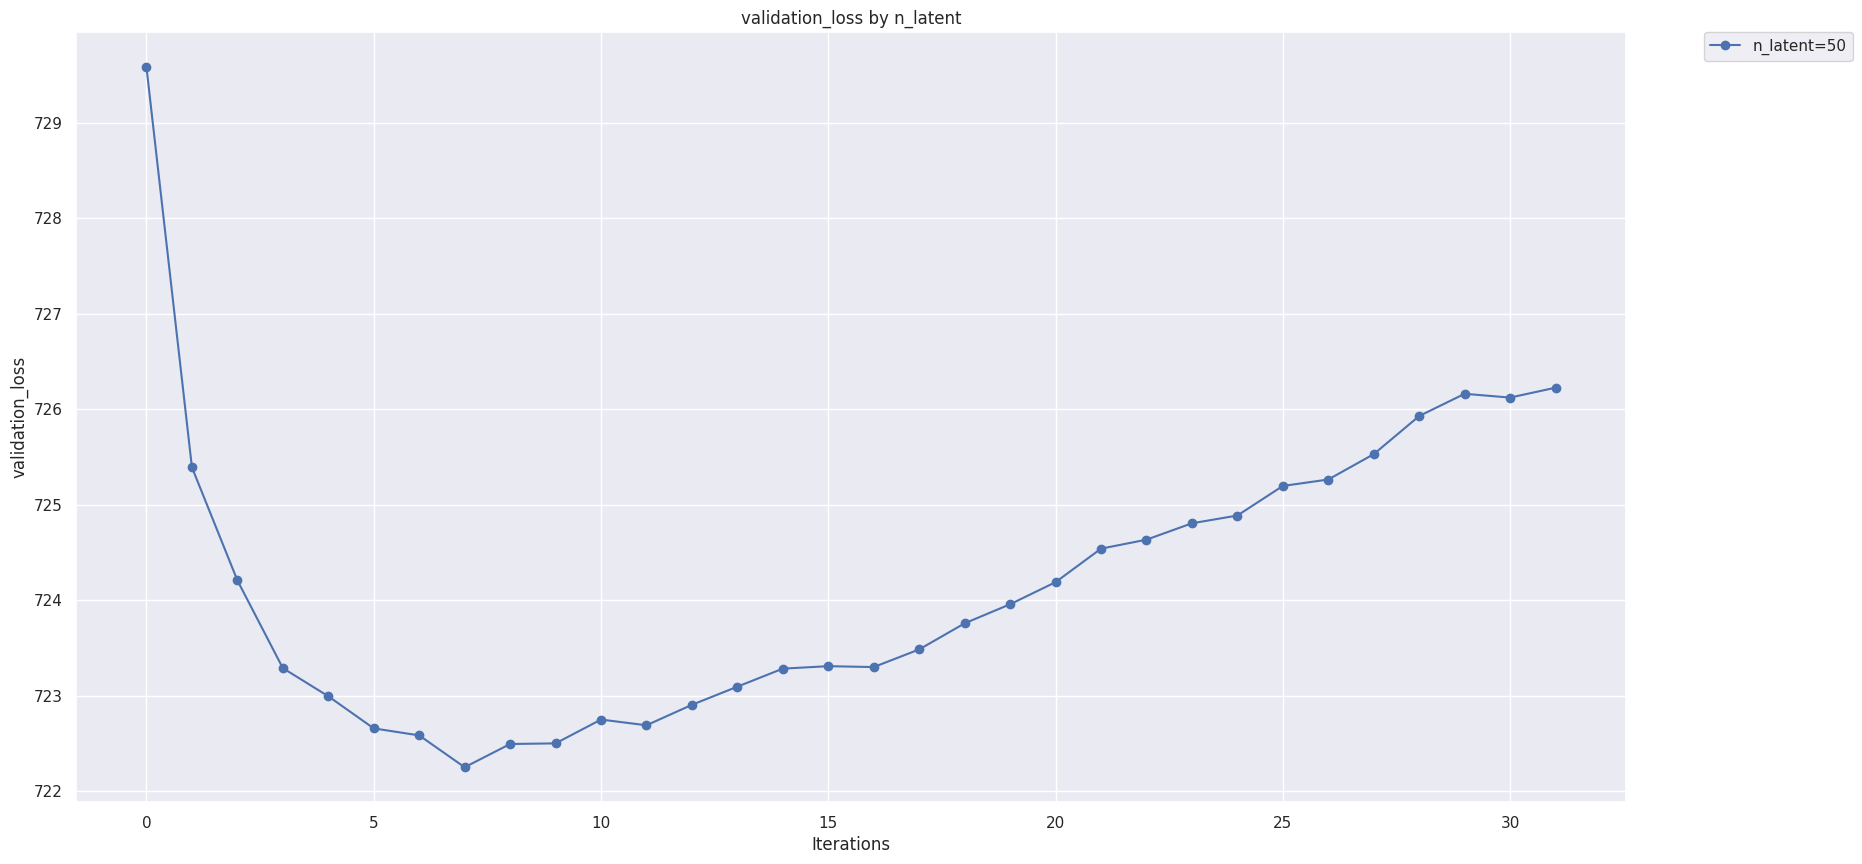

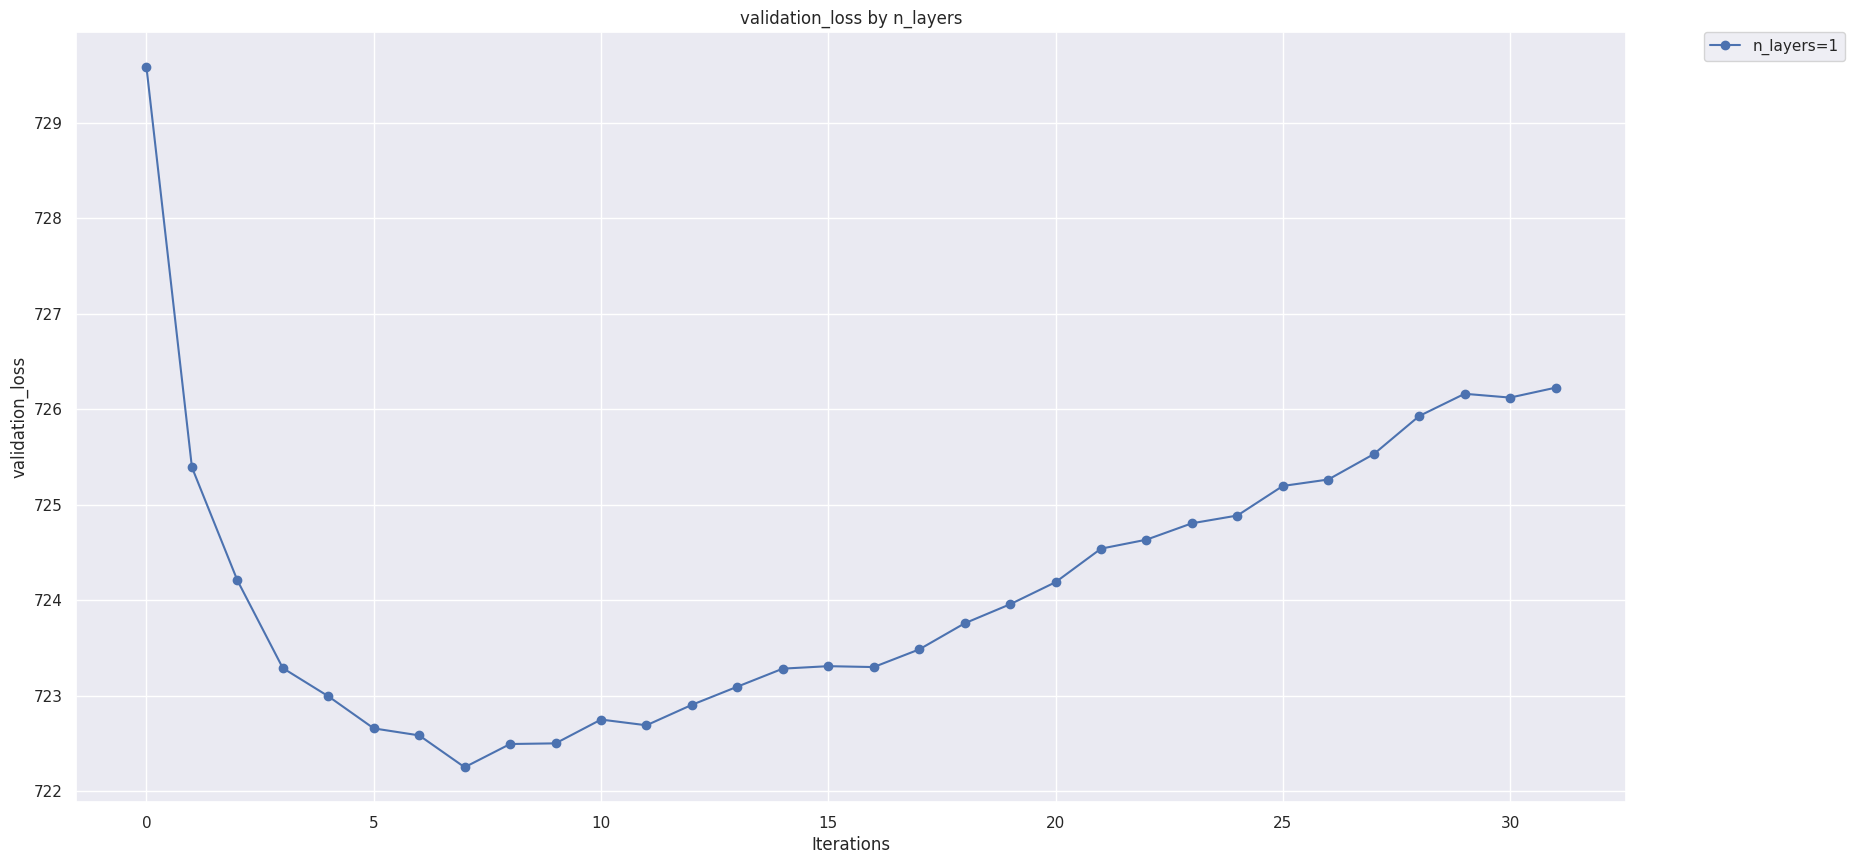

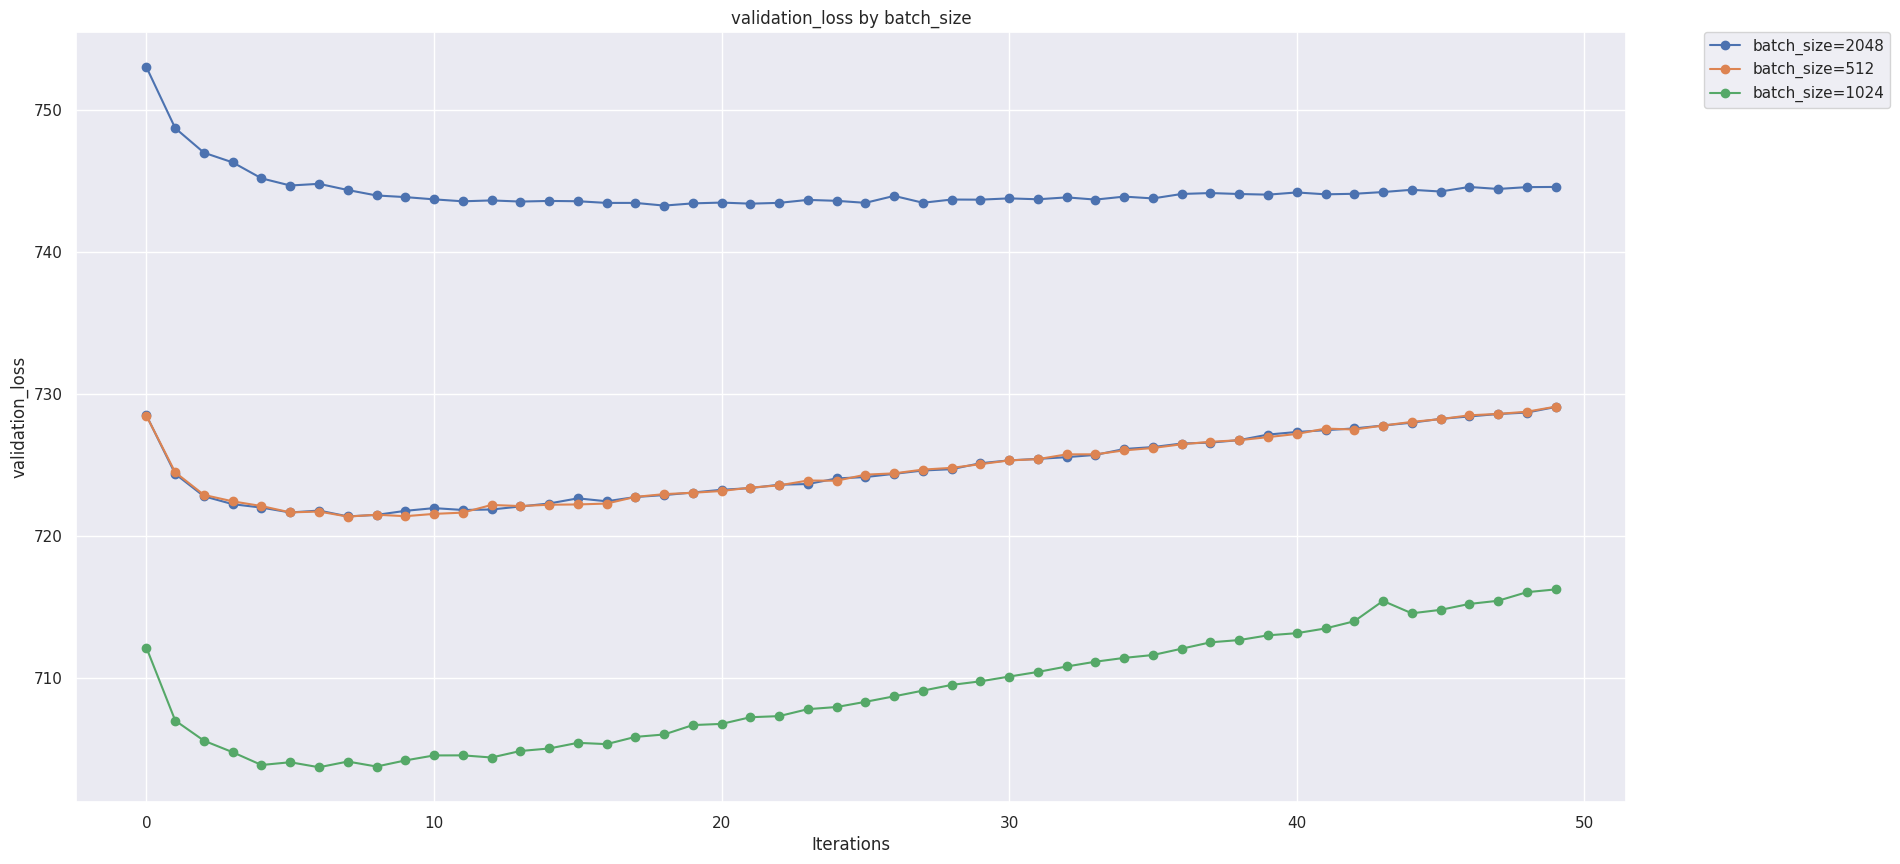

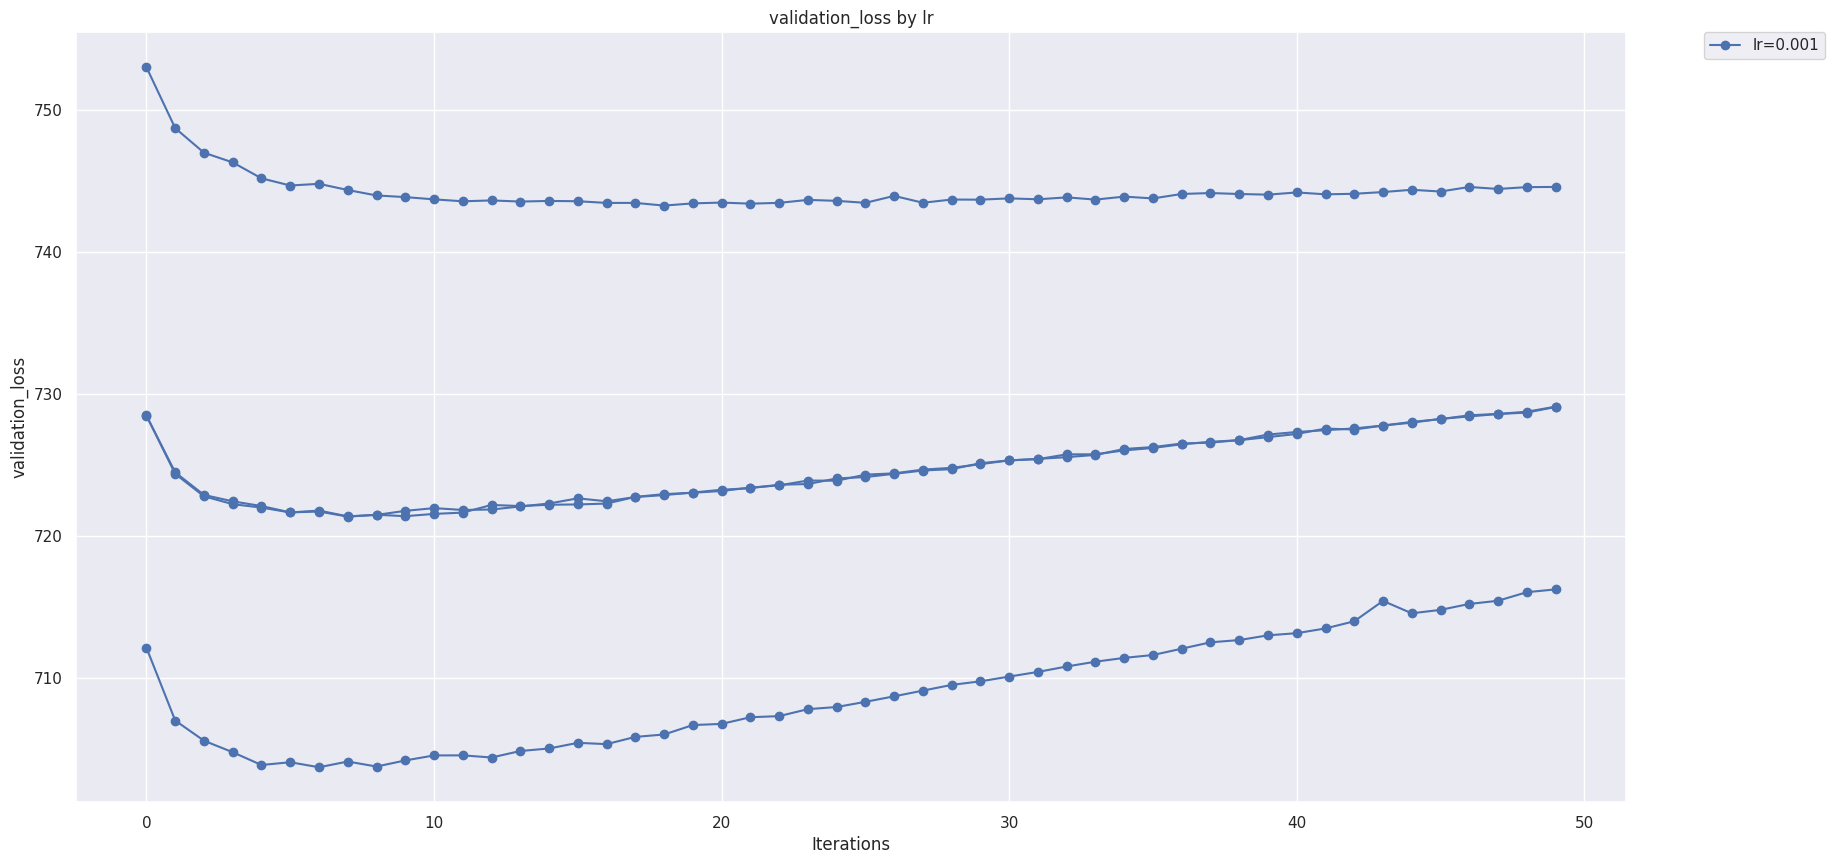

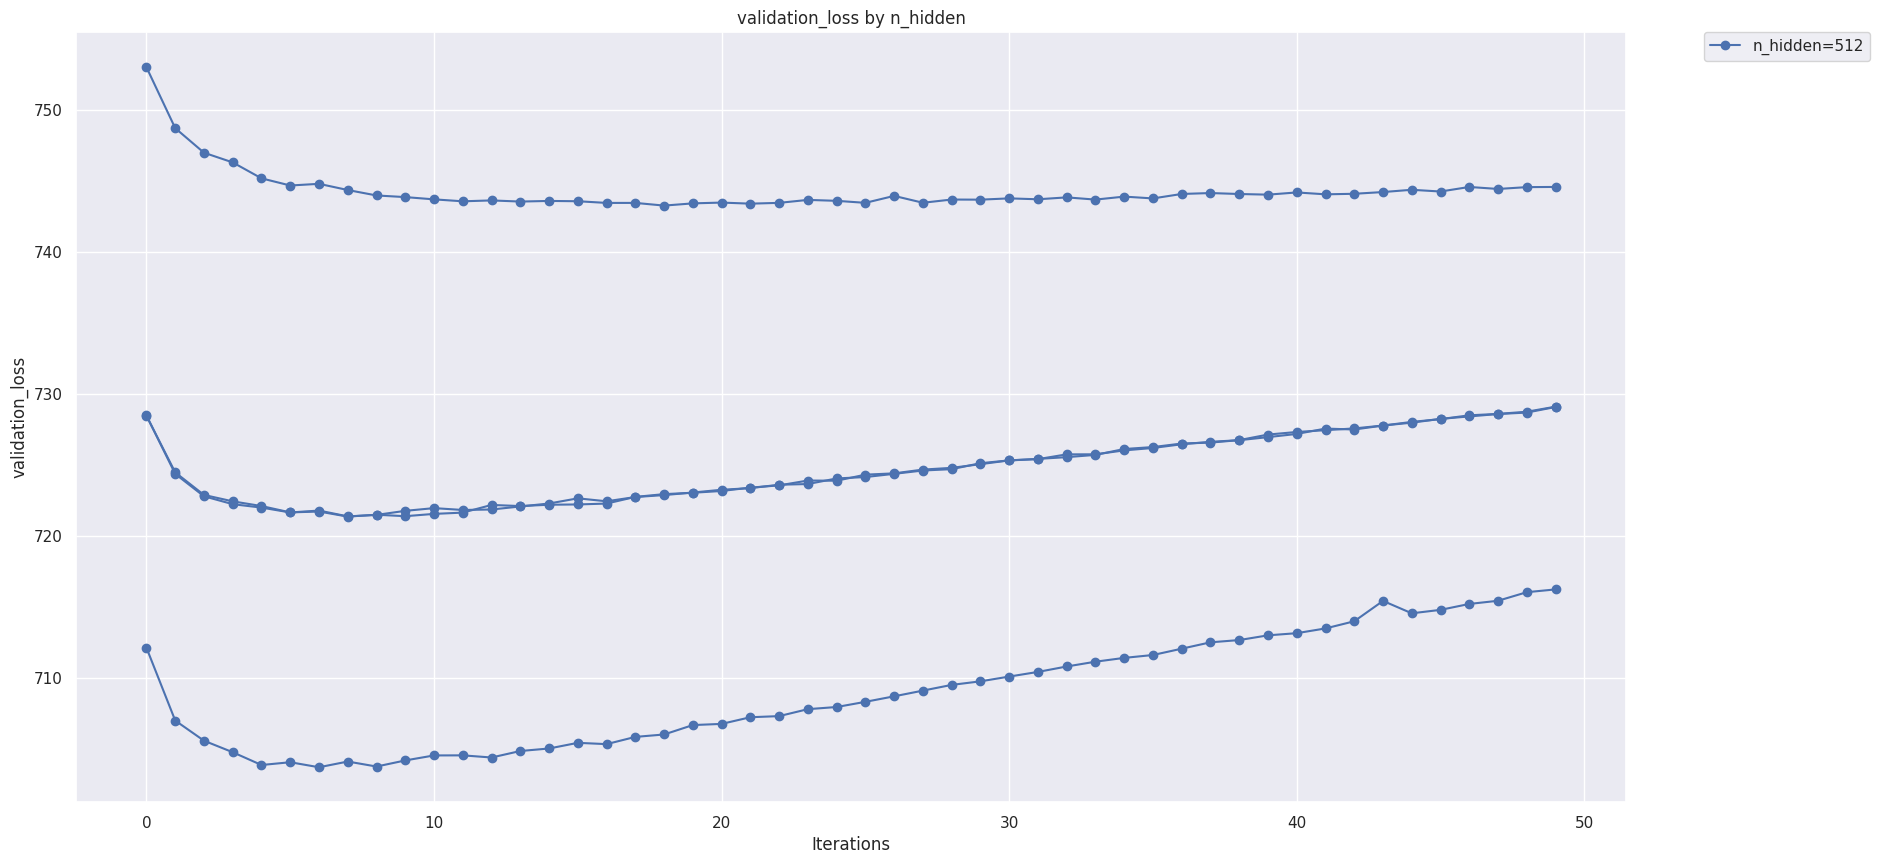

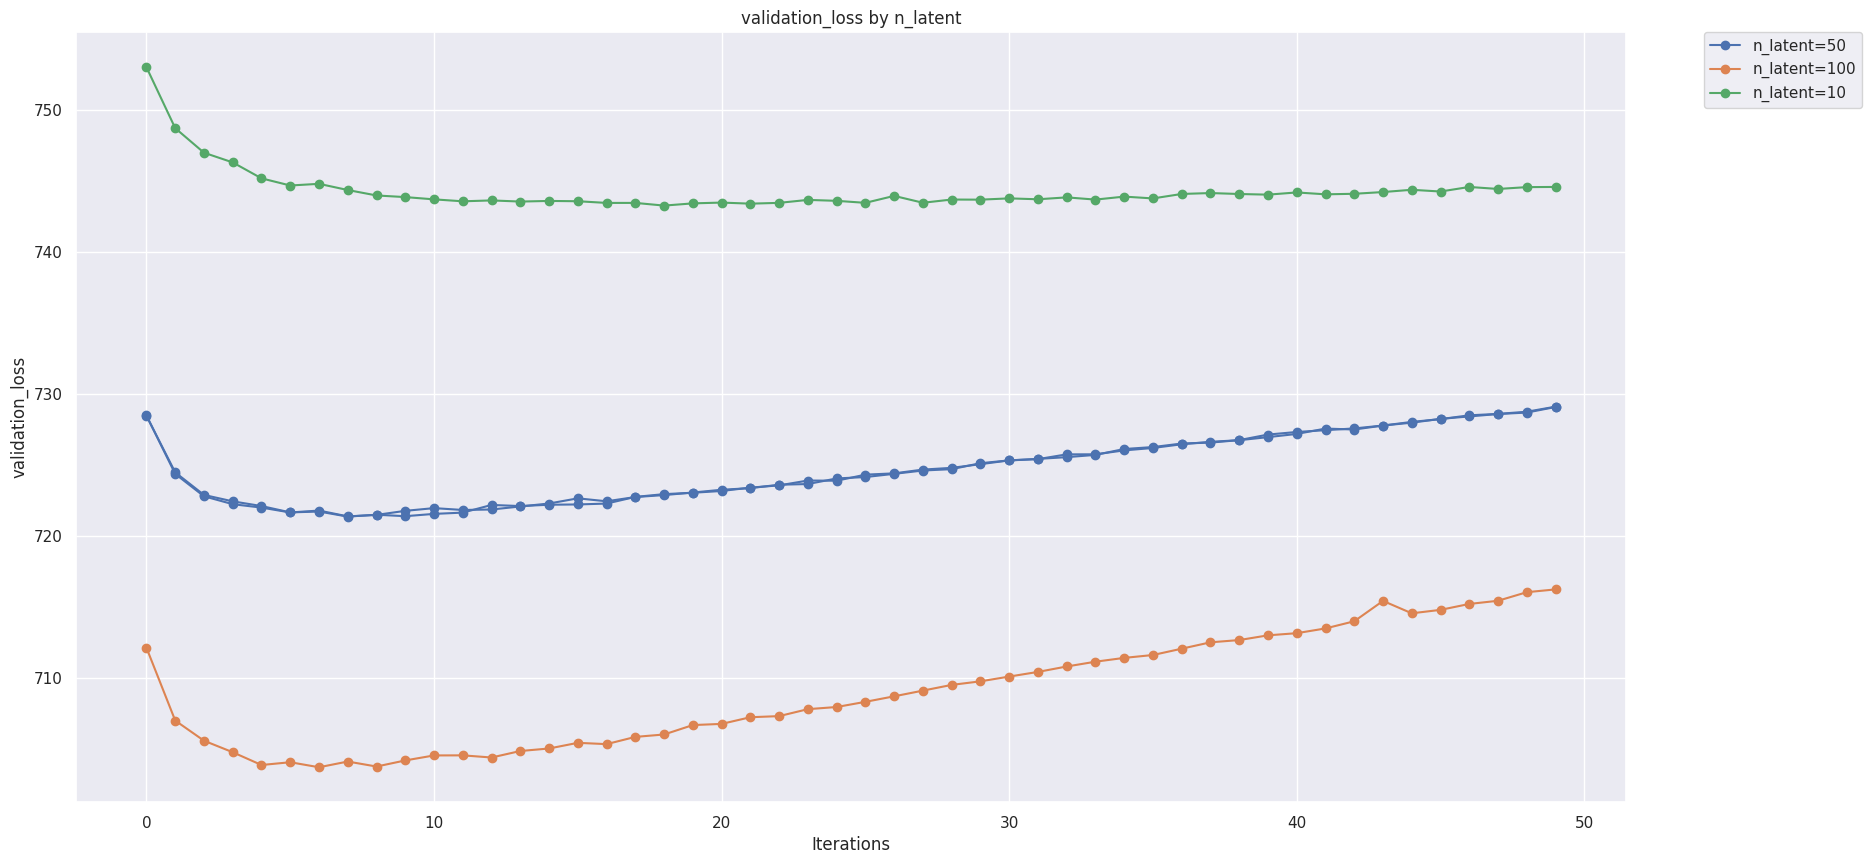

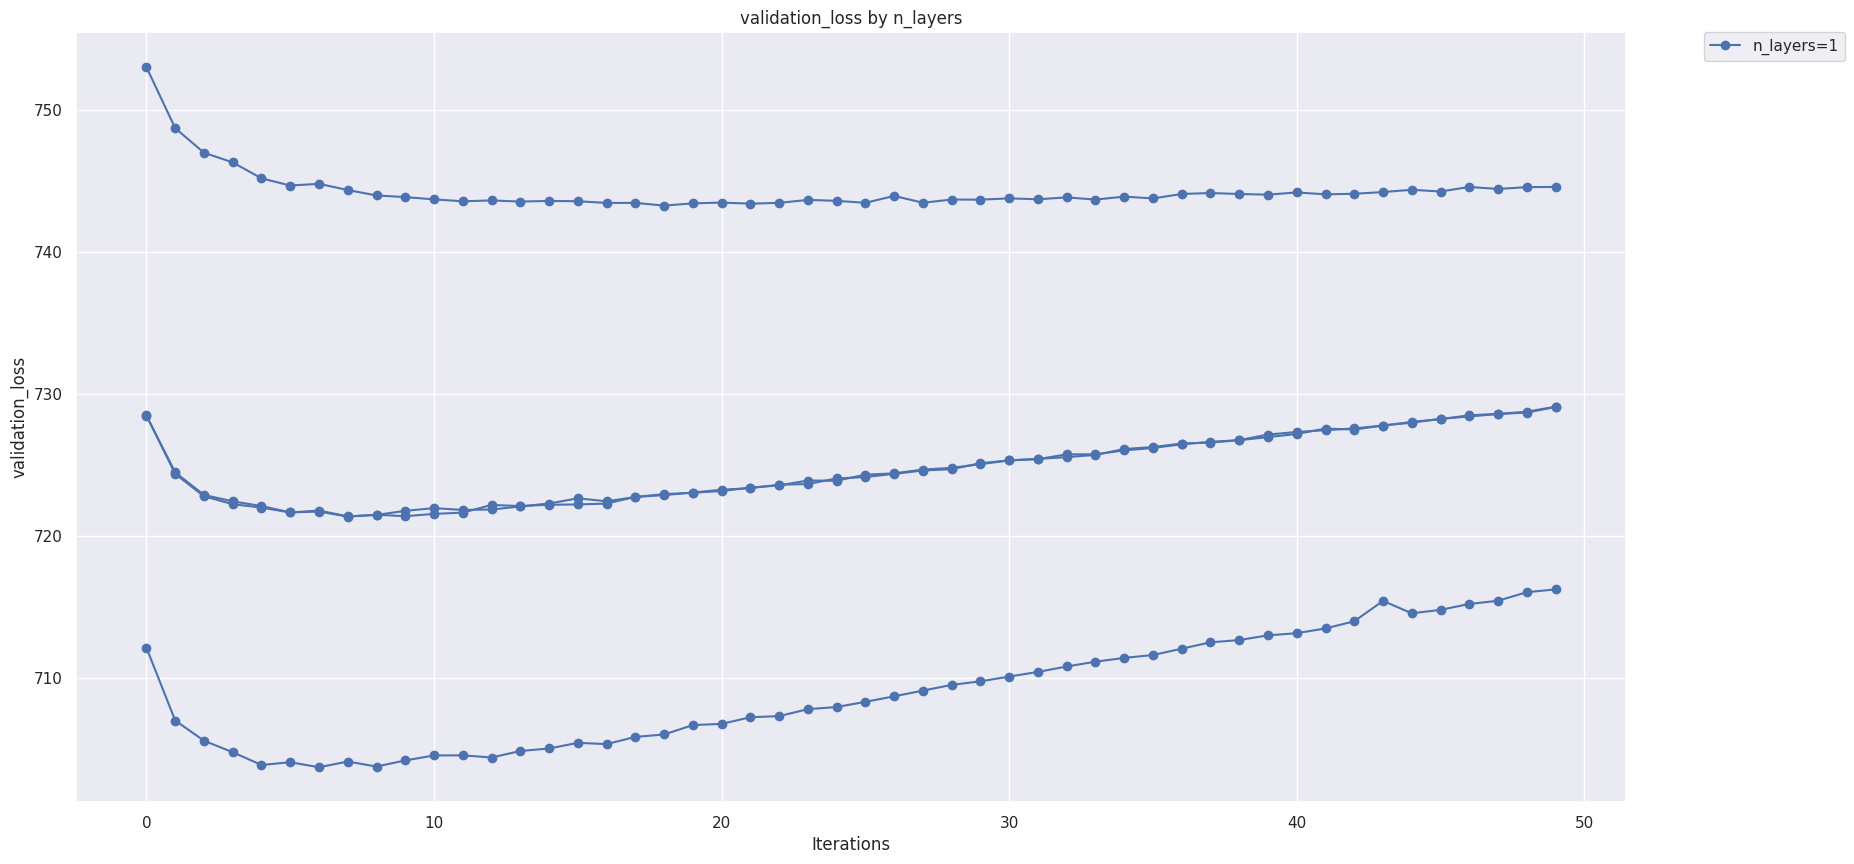

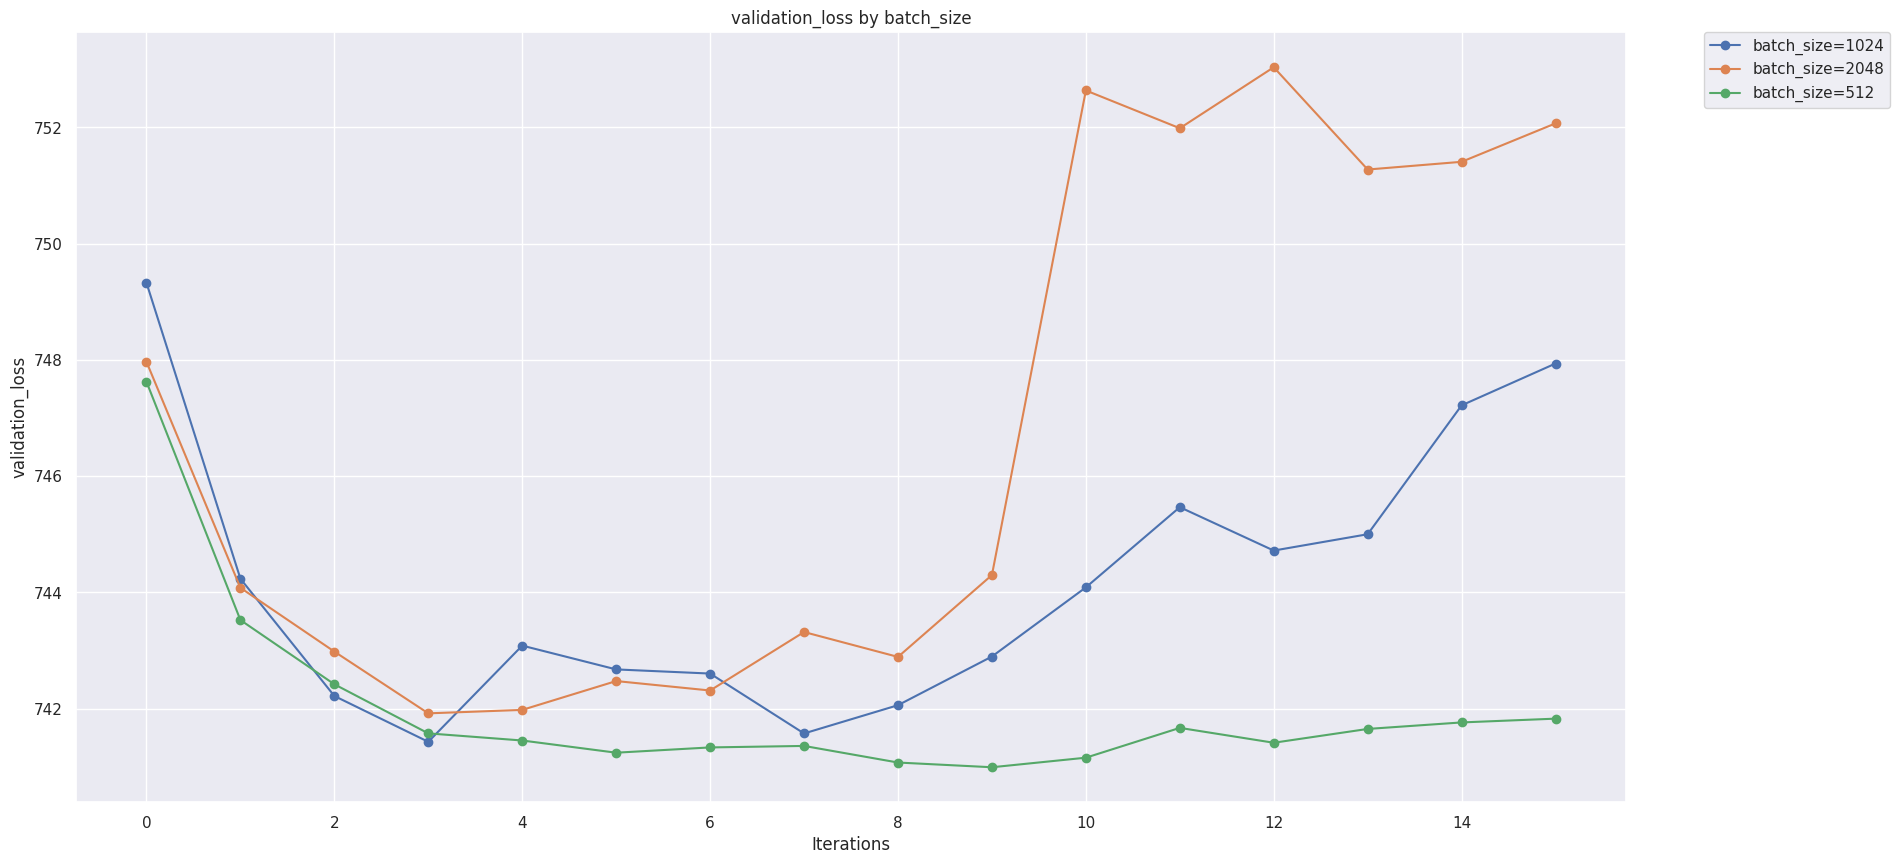

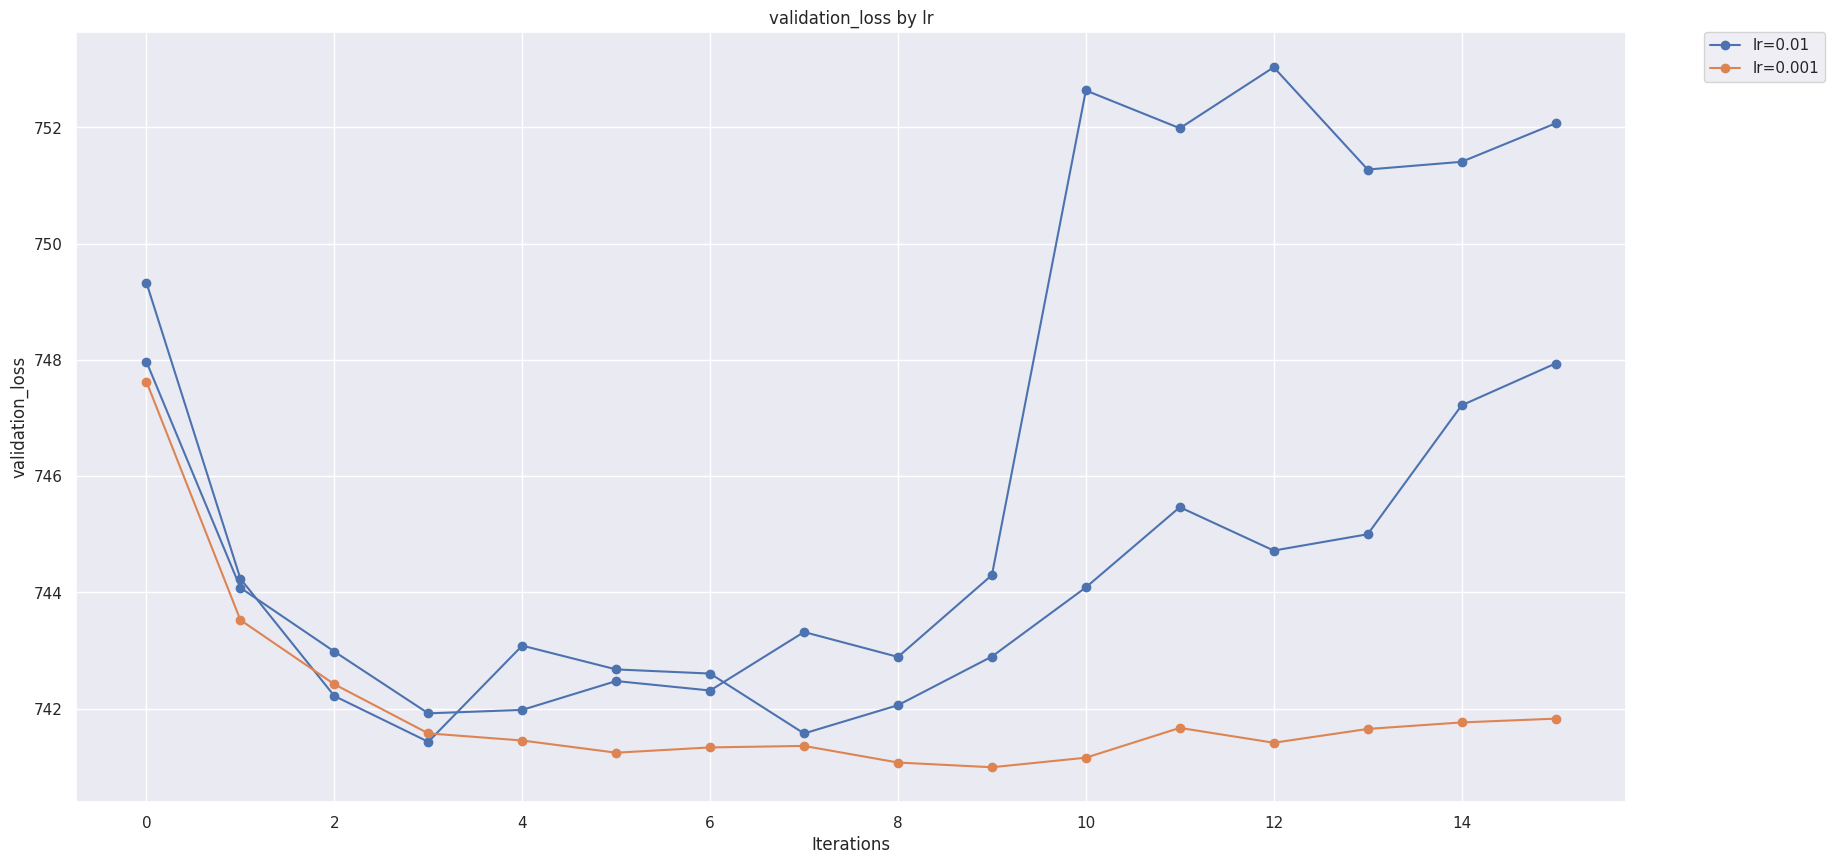

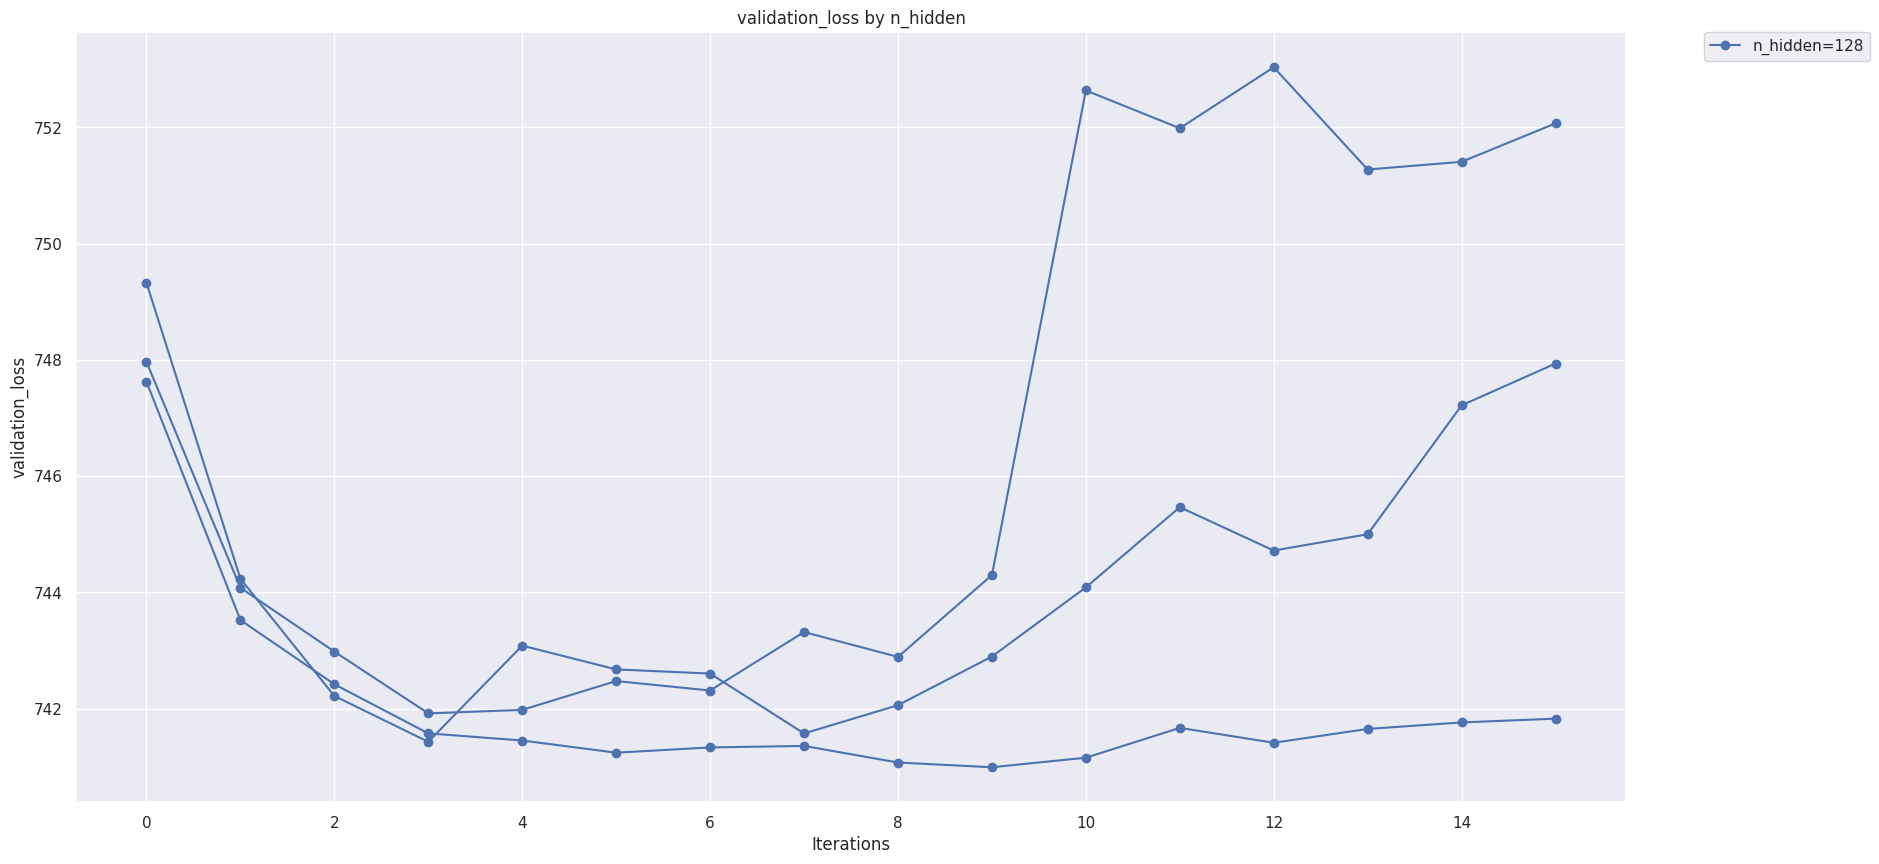

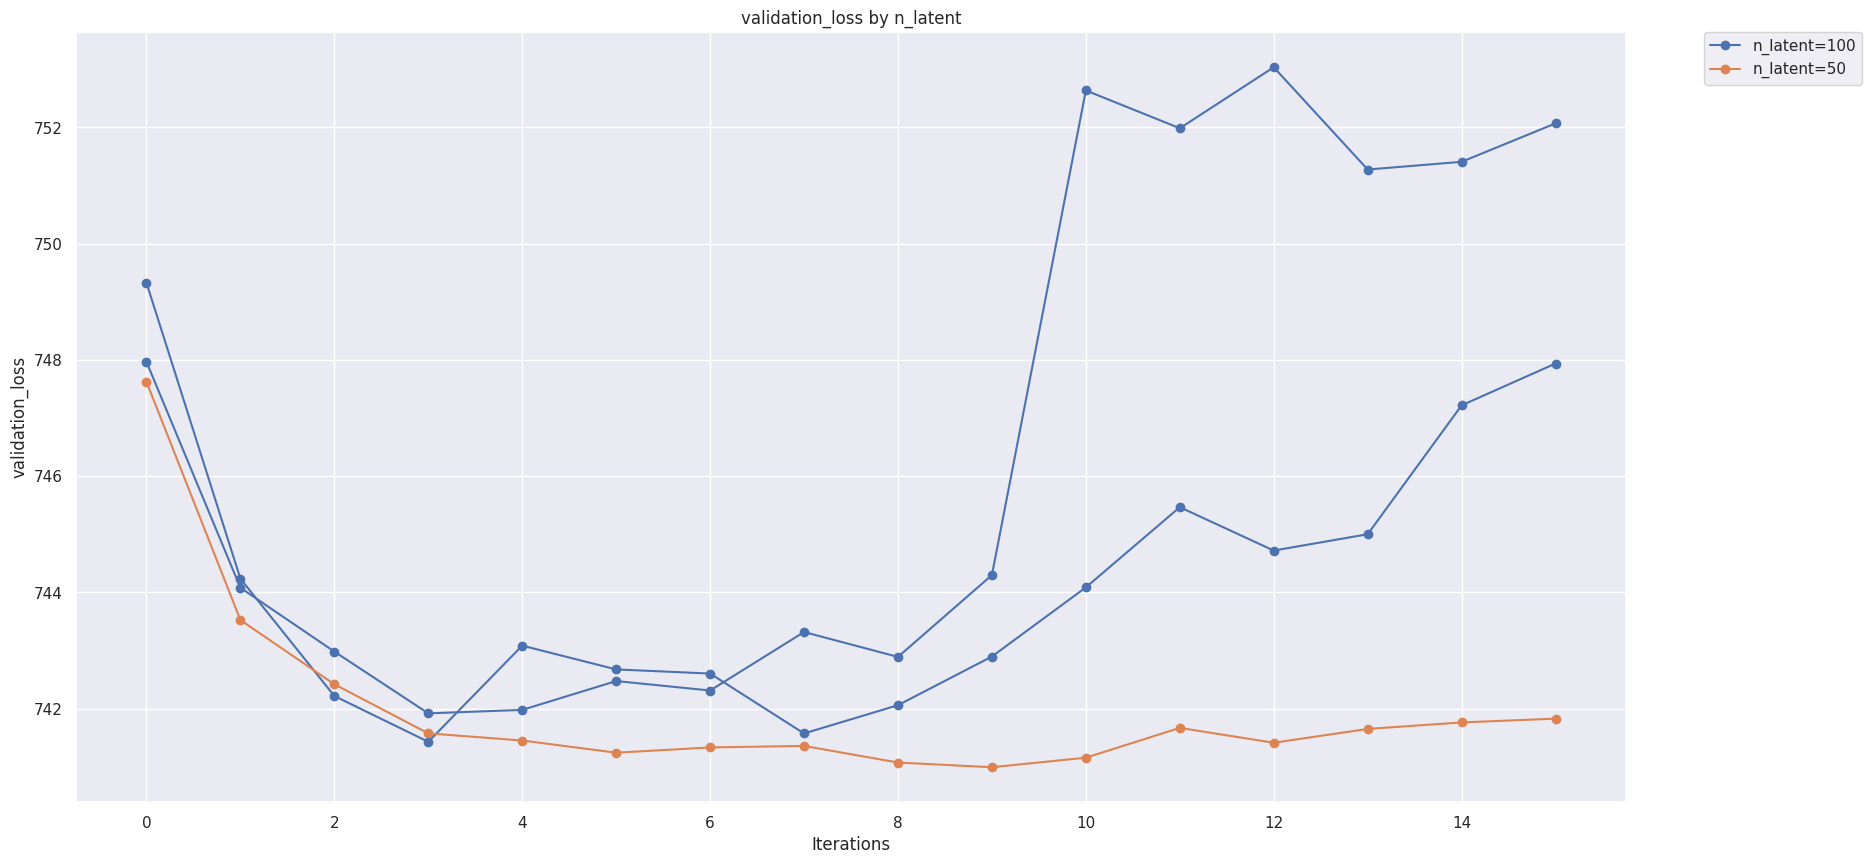

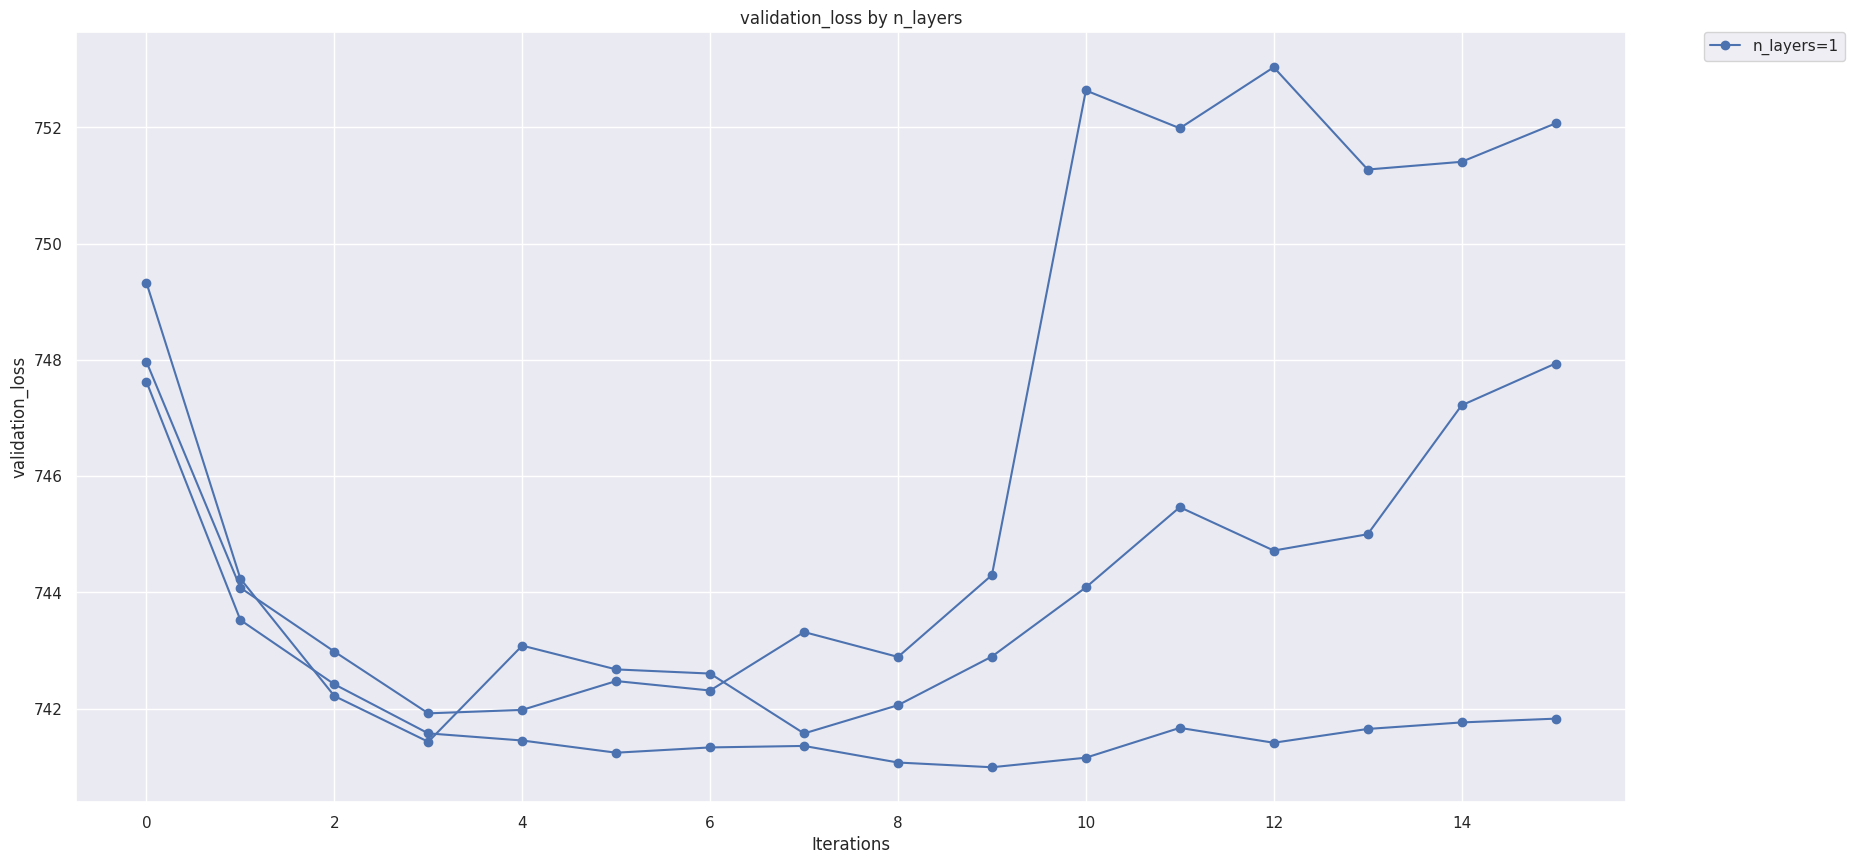

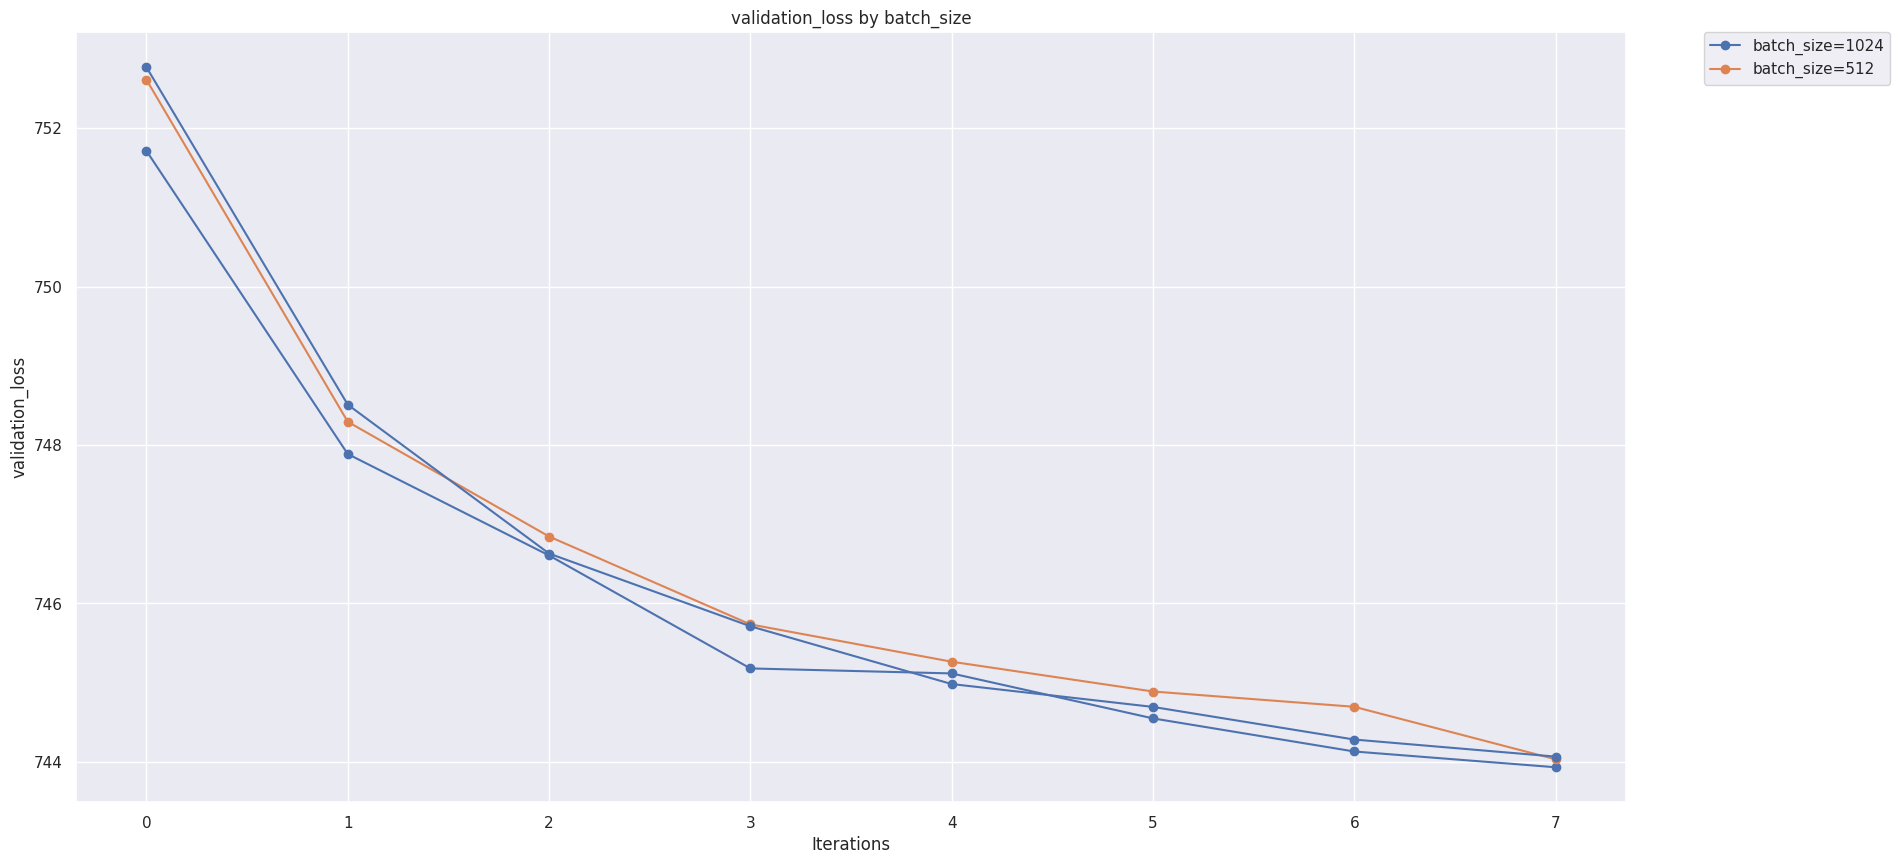

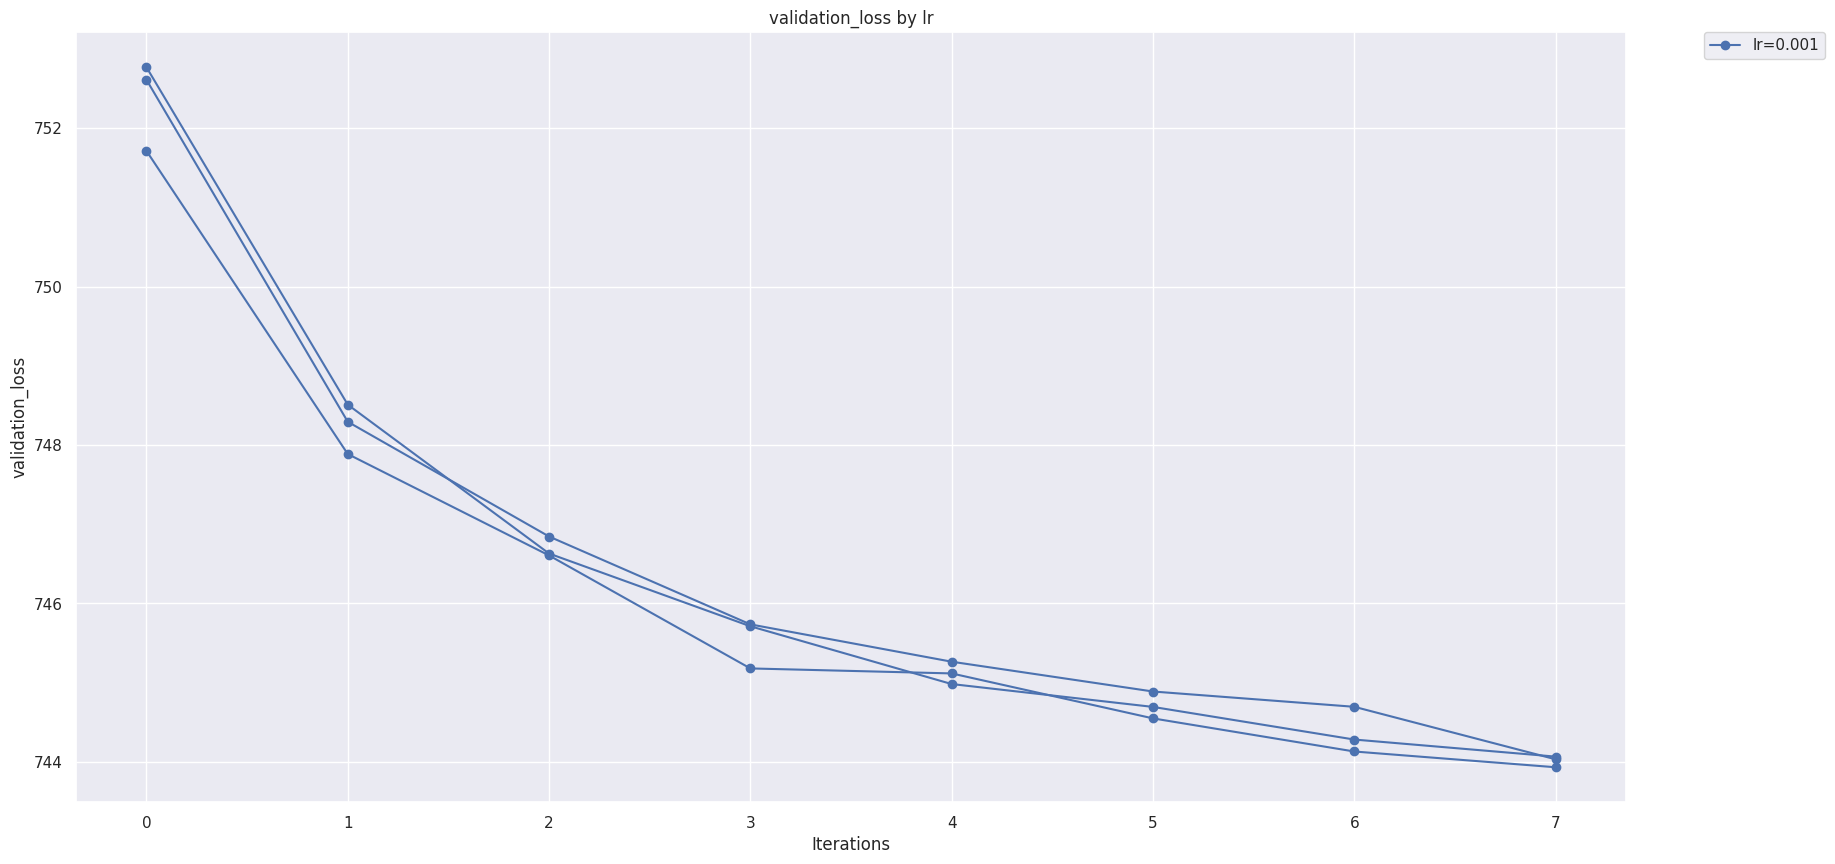

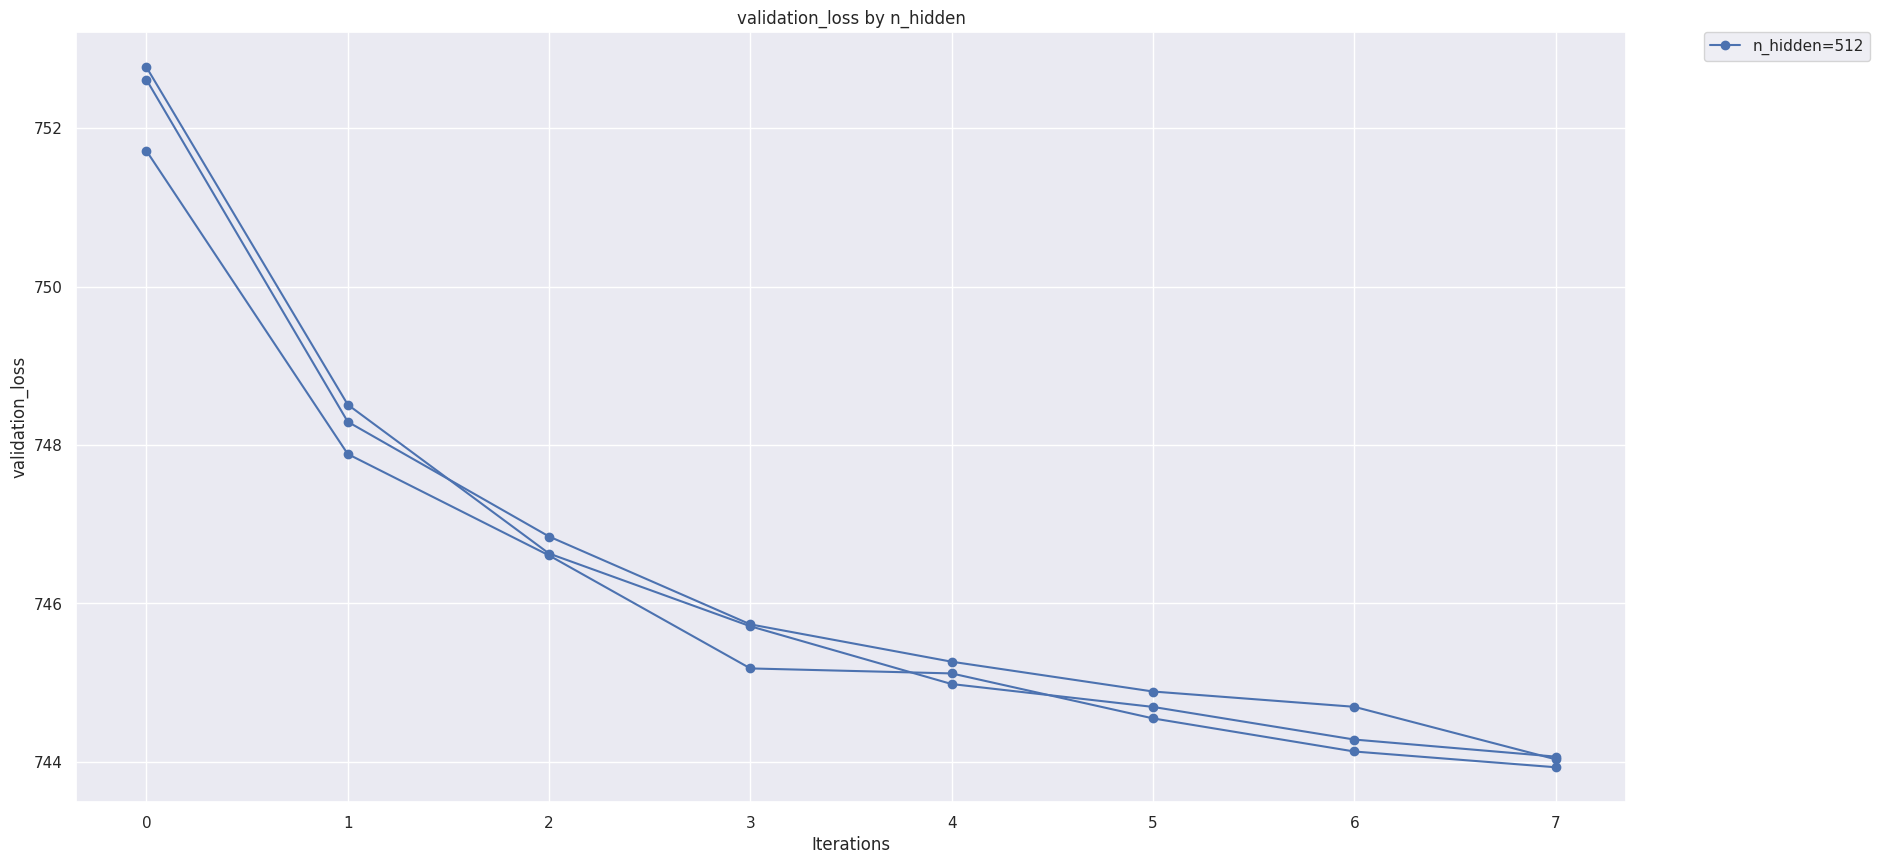

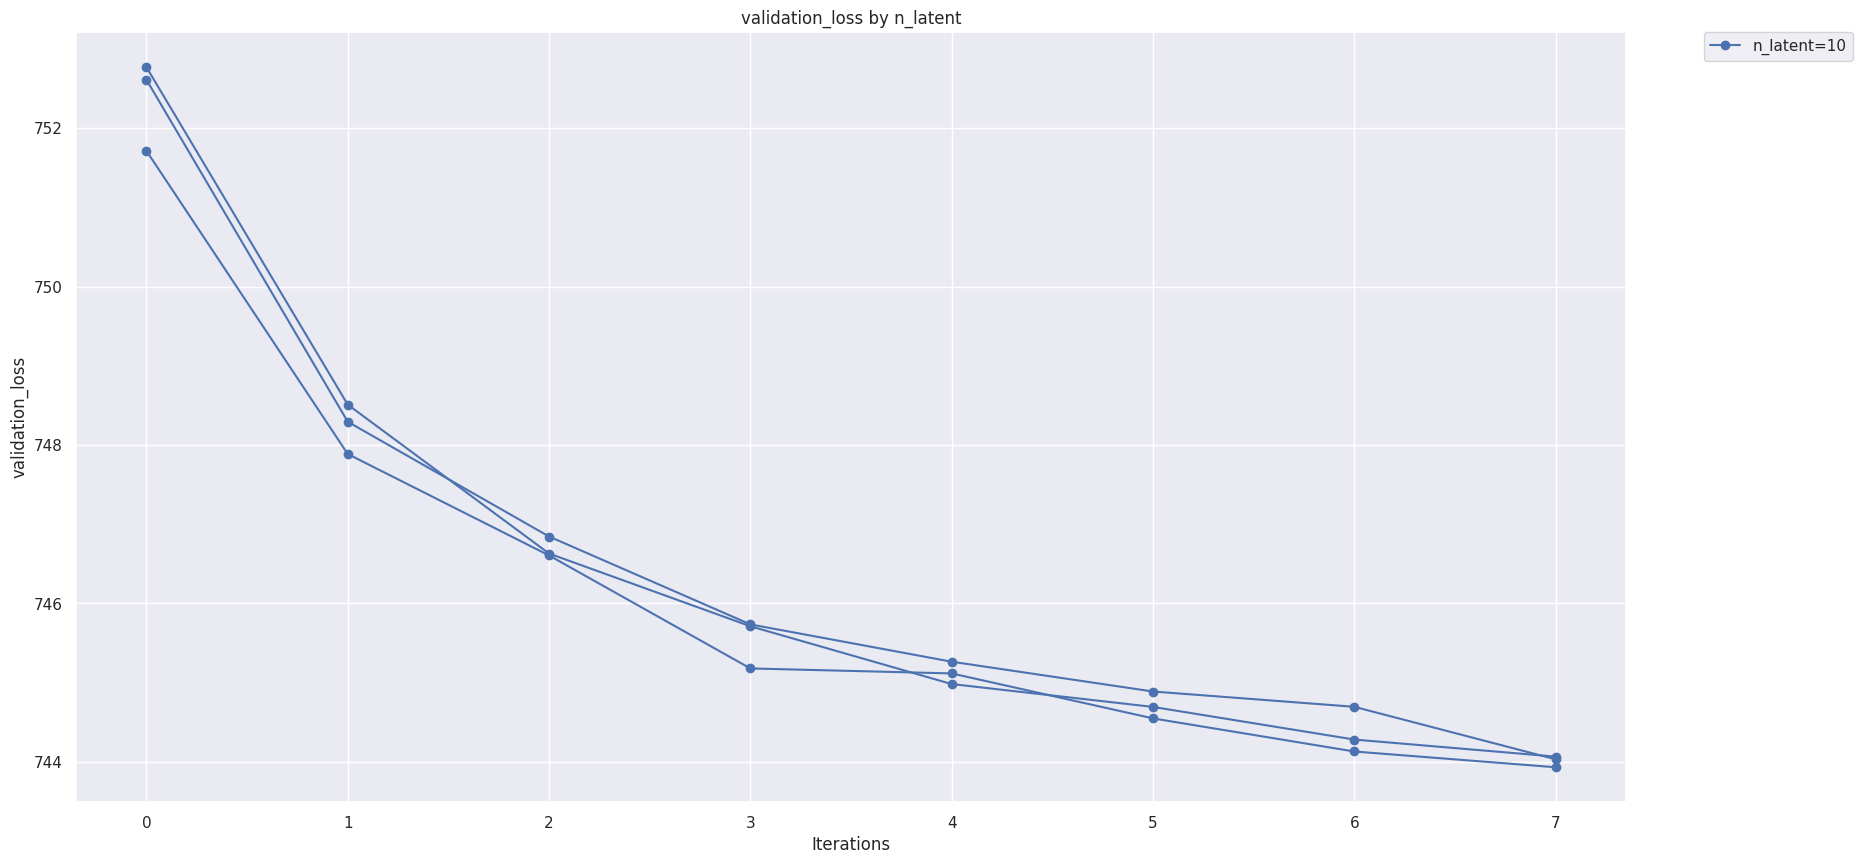

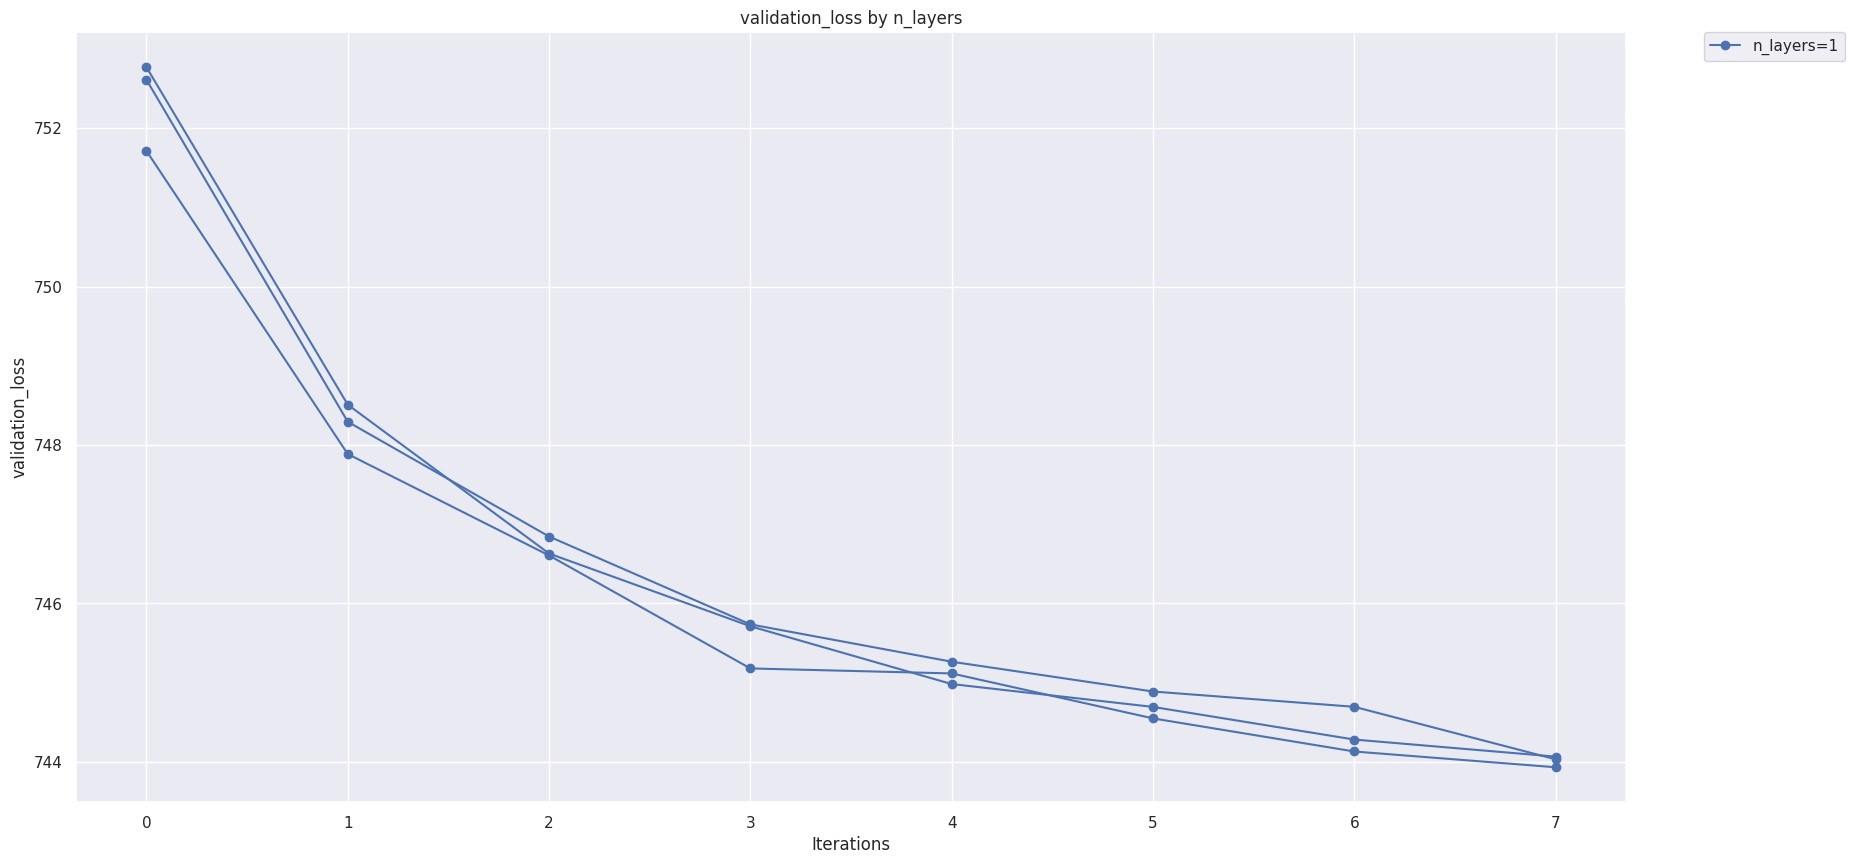

In [4]:
for iters in trial_info["iters"].unique(): 
    if iters < 4:
        continue
    for param in search_params:
        plot_trials(
            trial_info, 
            trial_progress, 
            trial_params, 
            param,
            iters=iters,
            figsize=(20, 10),
        )